# **BANK CUSTOMER CHURN MODEL**

**Objective :**

1.  Data Visualization
2.  Data Preprocessing
3.  Define Target Variable (y) and Feature Variables (X)
4.  Train Test Split
5.  Modeling
6.  Model Evaluation
7.  Prediction
















**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Import Data**

In [ ]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 13)

In [ ]:
df.info

<bound method DataFrame.info of       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  Num Of Products  Has Credit Card  Is Active Member

In [ ]:
df = df.set_index('CustomerId')

In [ ]:
df.isnull().sum()

Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [ ]:
df.shape

(10000, 12)

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

**Describe Data**

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Data Visualization**

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [ ]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

<Axes: xlabel='Geography', ylabel='Estimated Salary'>

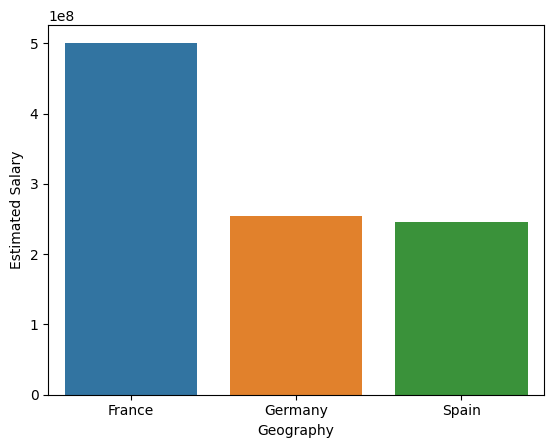

In [ ]:
sns.countplot(x='Geography',data=df)
Bank_Customer = df.groupby(['Geography'], as_index=False)['Estimated Salary'].sum().sort_values(by='Estimated Salary', ascending=False)
sns.barplot(x = 'Geography',y= 'Estimated Salary' ,data = Bank_Customer)

<Axes: xlabel='Geography', ylabel='count'>

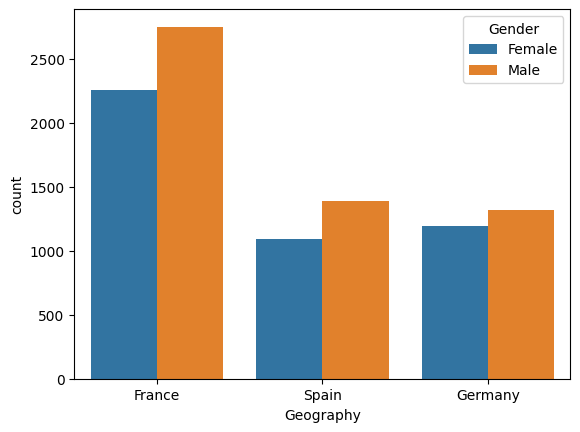

In [ ]:
sns.countplot(data=df, x='Geography', hue='Gender')

<Axes: xlabel='Gender', ylabel='Estimated Salary'>

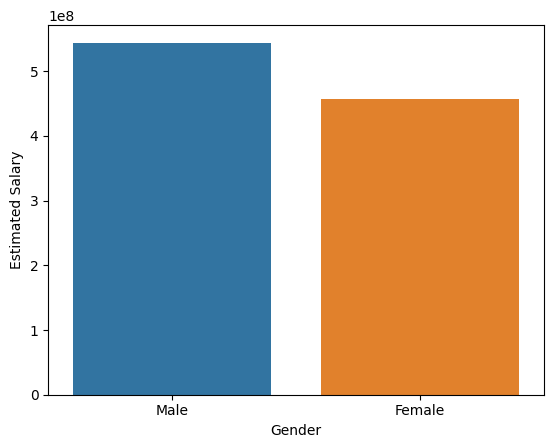

In [ ]:
sns.countplot(x='Gender',data=df)
Bank_Customer = df.groupby(['Gender'], as_index=False)['Estimated Salary'].sum().sort_values(by='Estimated Salary', ascending=False)
sns.barplot(x = 'Gender',y= 'Estimated Salary' ,data = Bank_Customer)

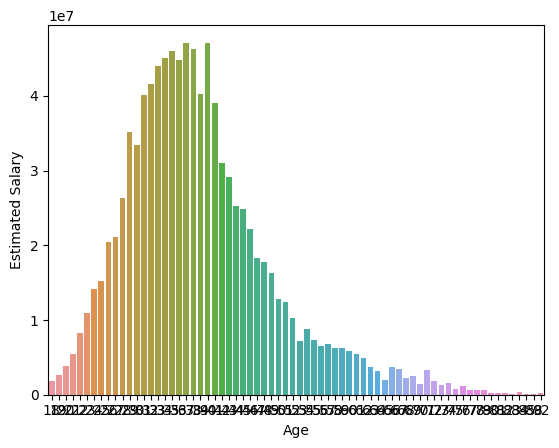

In [ ]:
sns.countplot(x='Age',data=df)
Bank_Customer = df.groupby(['Age'], as_index=False)['Estimated Salary'].sum().sort_values(by='Estimated Salary', ascending=False)
sns.barplot(x = 'Age',y= 'Estimated Salary' ,data = Bank_Customer)
sns.set(rc={'figure.figsize':(10,15)})

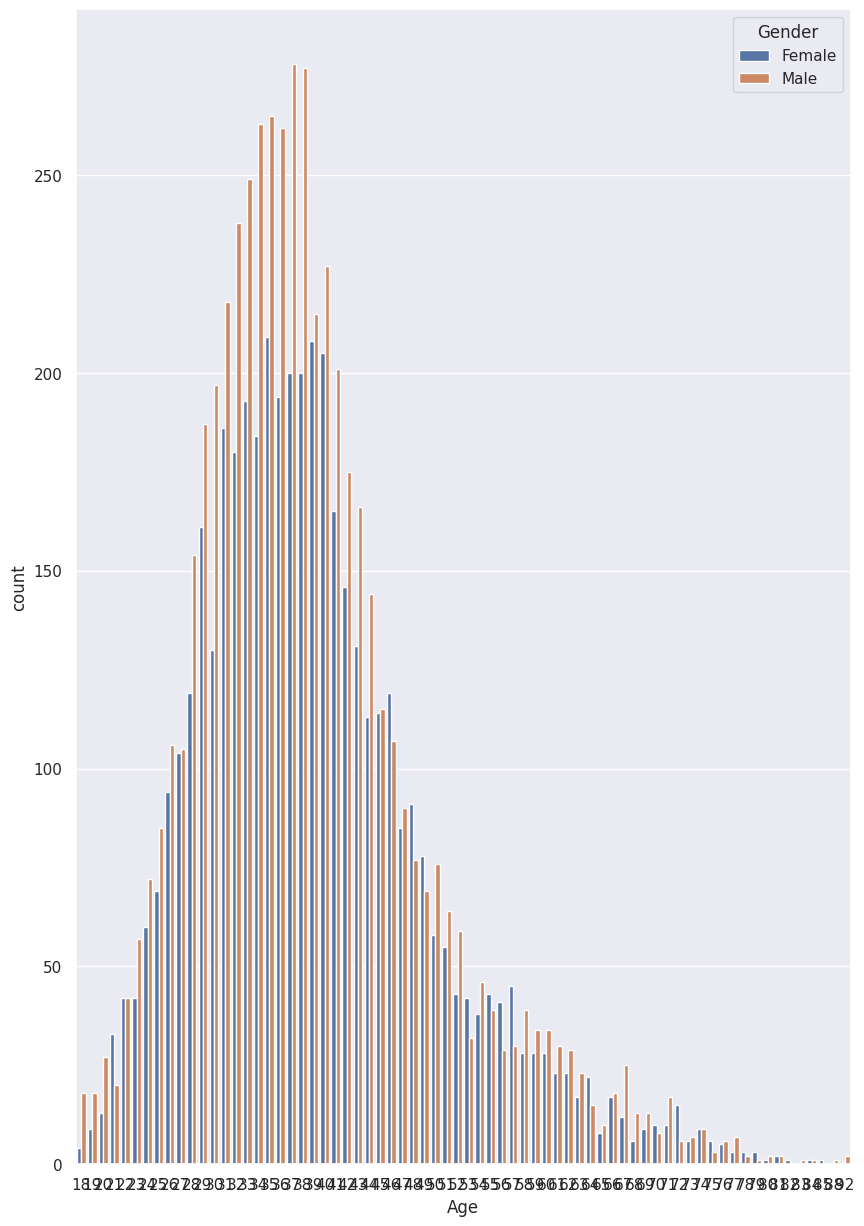

In [ ]:
sns.countplot(data=df, x='Age', hue='Gender')
sns.set(rc={'figure.figsize':(25,40)})

<Axes: xlabel='Tenure', ylabel='Estimated Salary'>

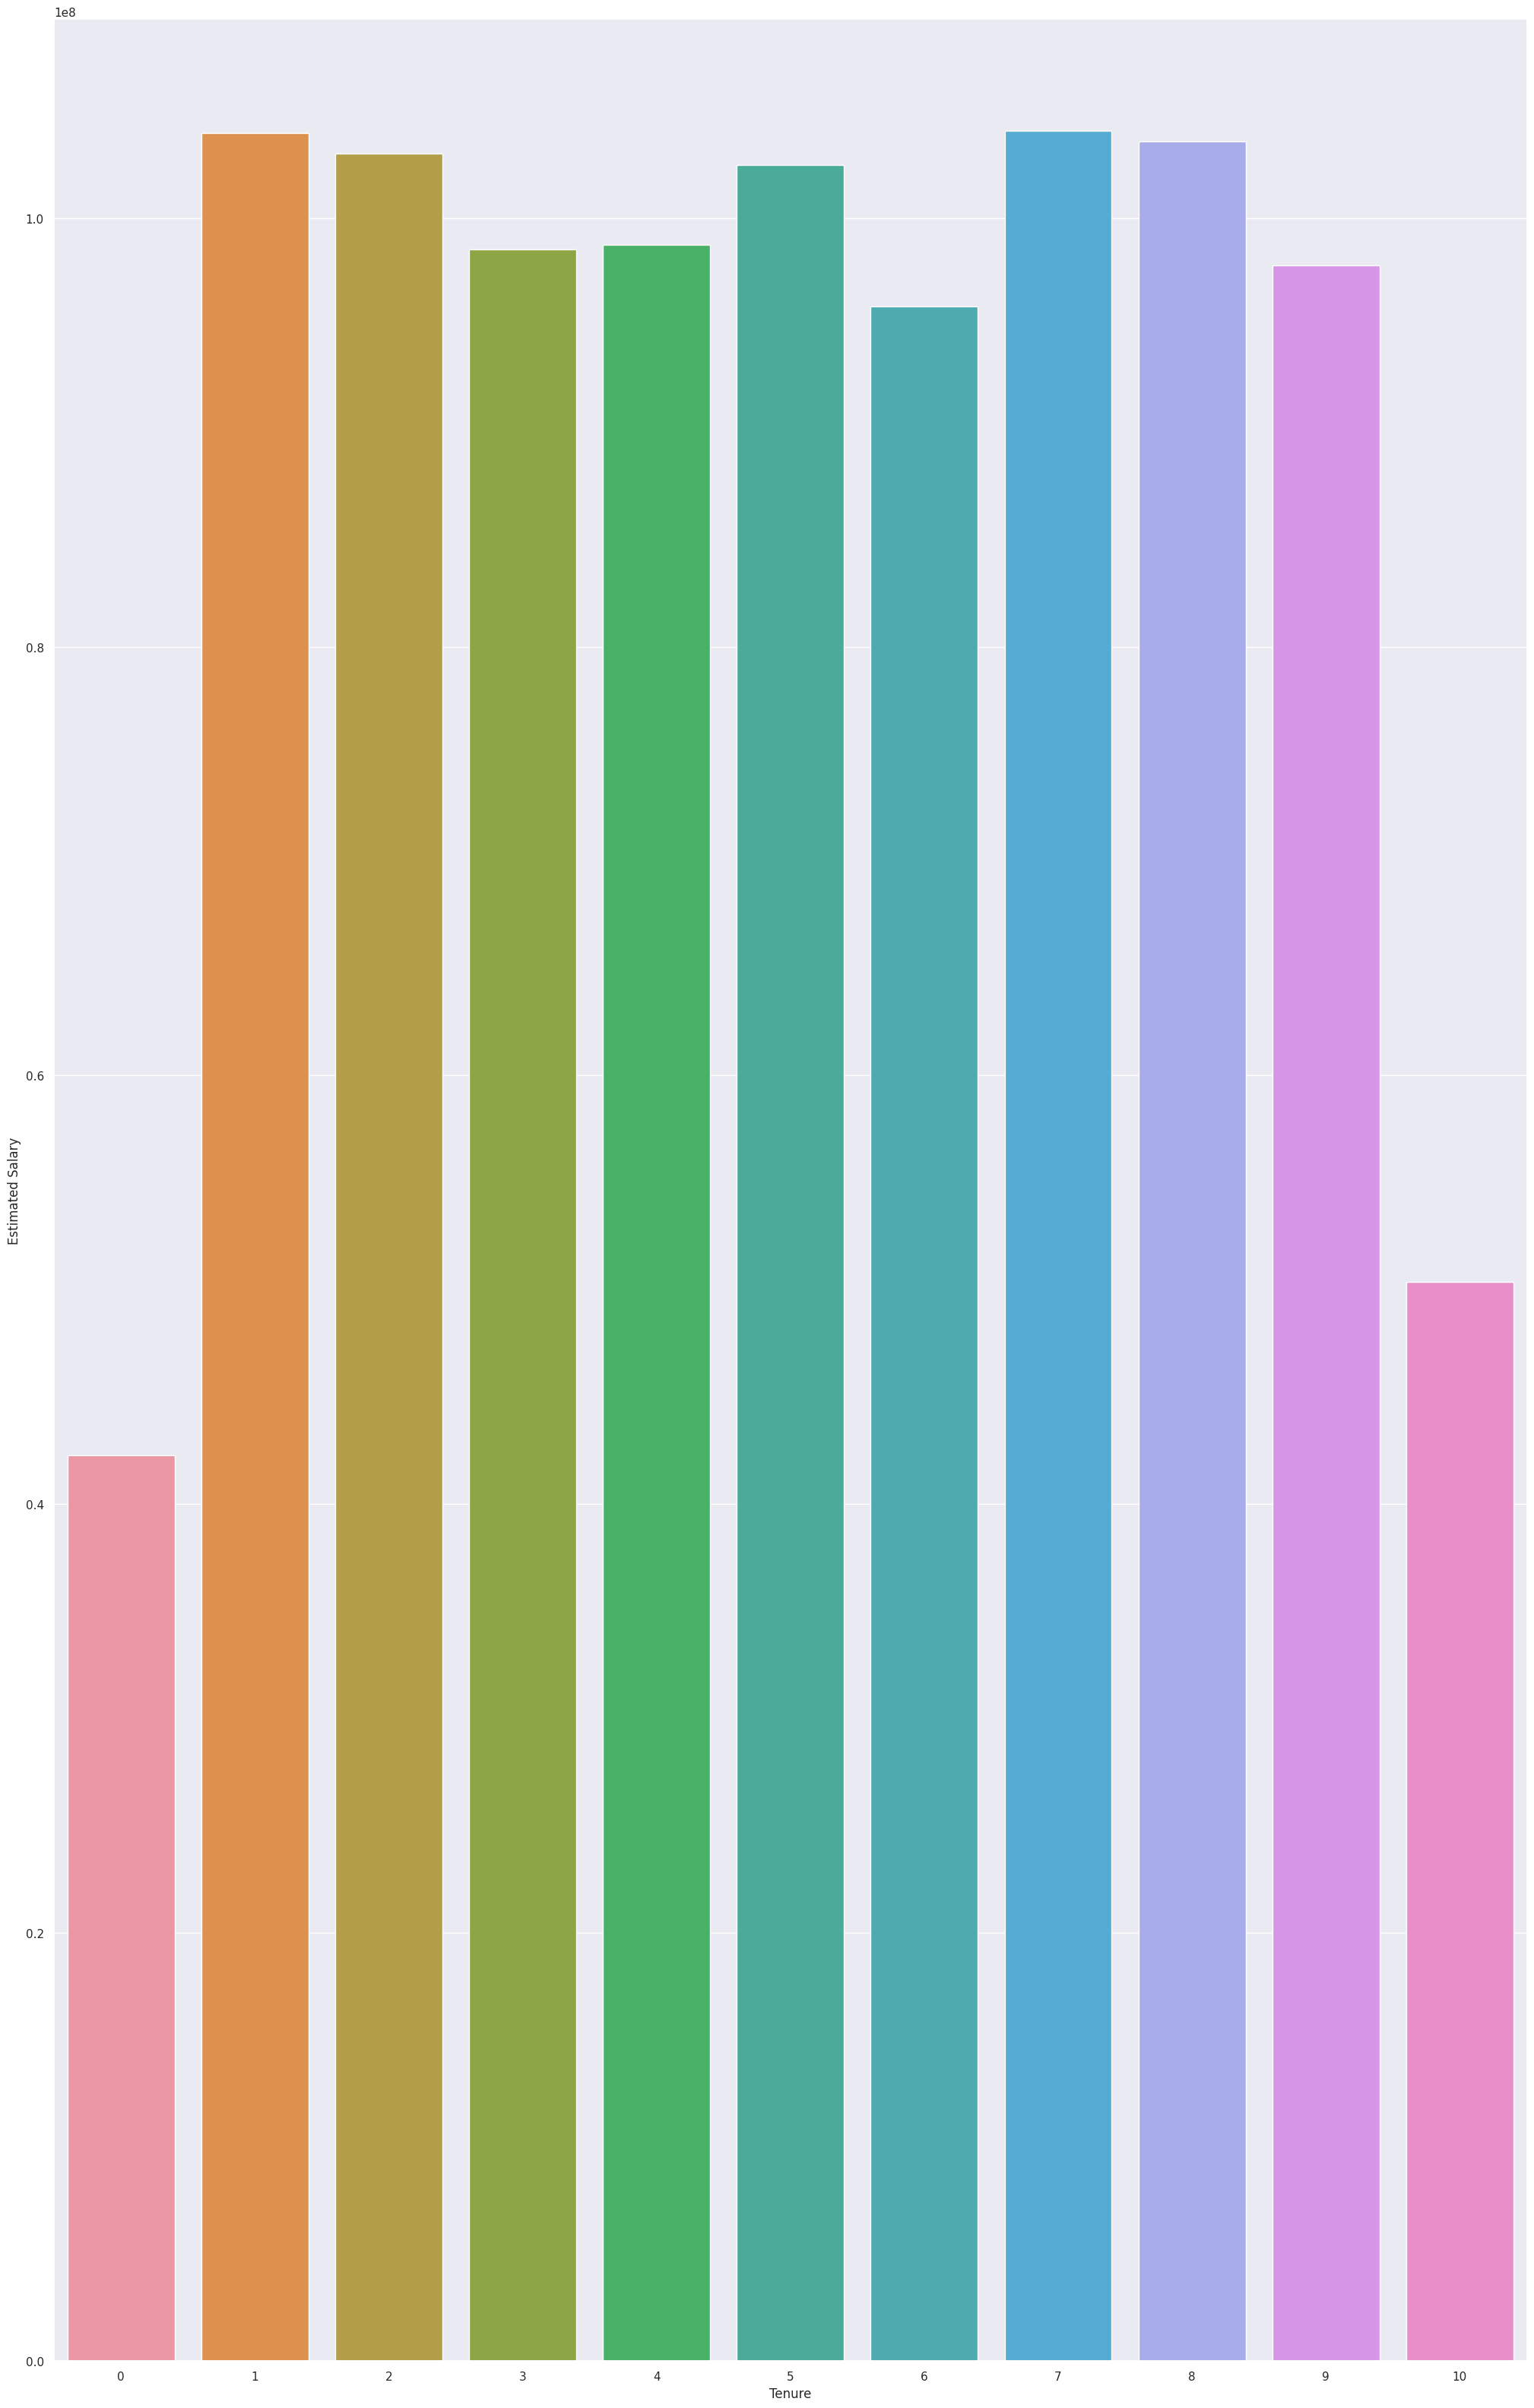

In [ ]:
sns.countplot(x='Tenure',data=df)
Bank_Customer = df.groupby(['Tenure'], as_index=False)['Estimated Salary'].sum().sort_values(by='Estimated Salary', ascending=False)
sns.barplot(x = 'Tenure',y= 'Estimated Salary' ,data = Bank_Customer)

<Axes: xlabel='Tenure', ylabel='count'>

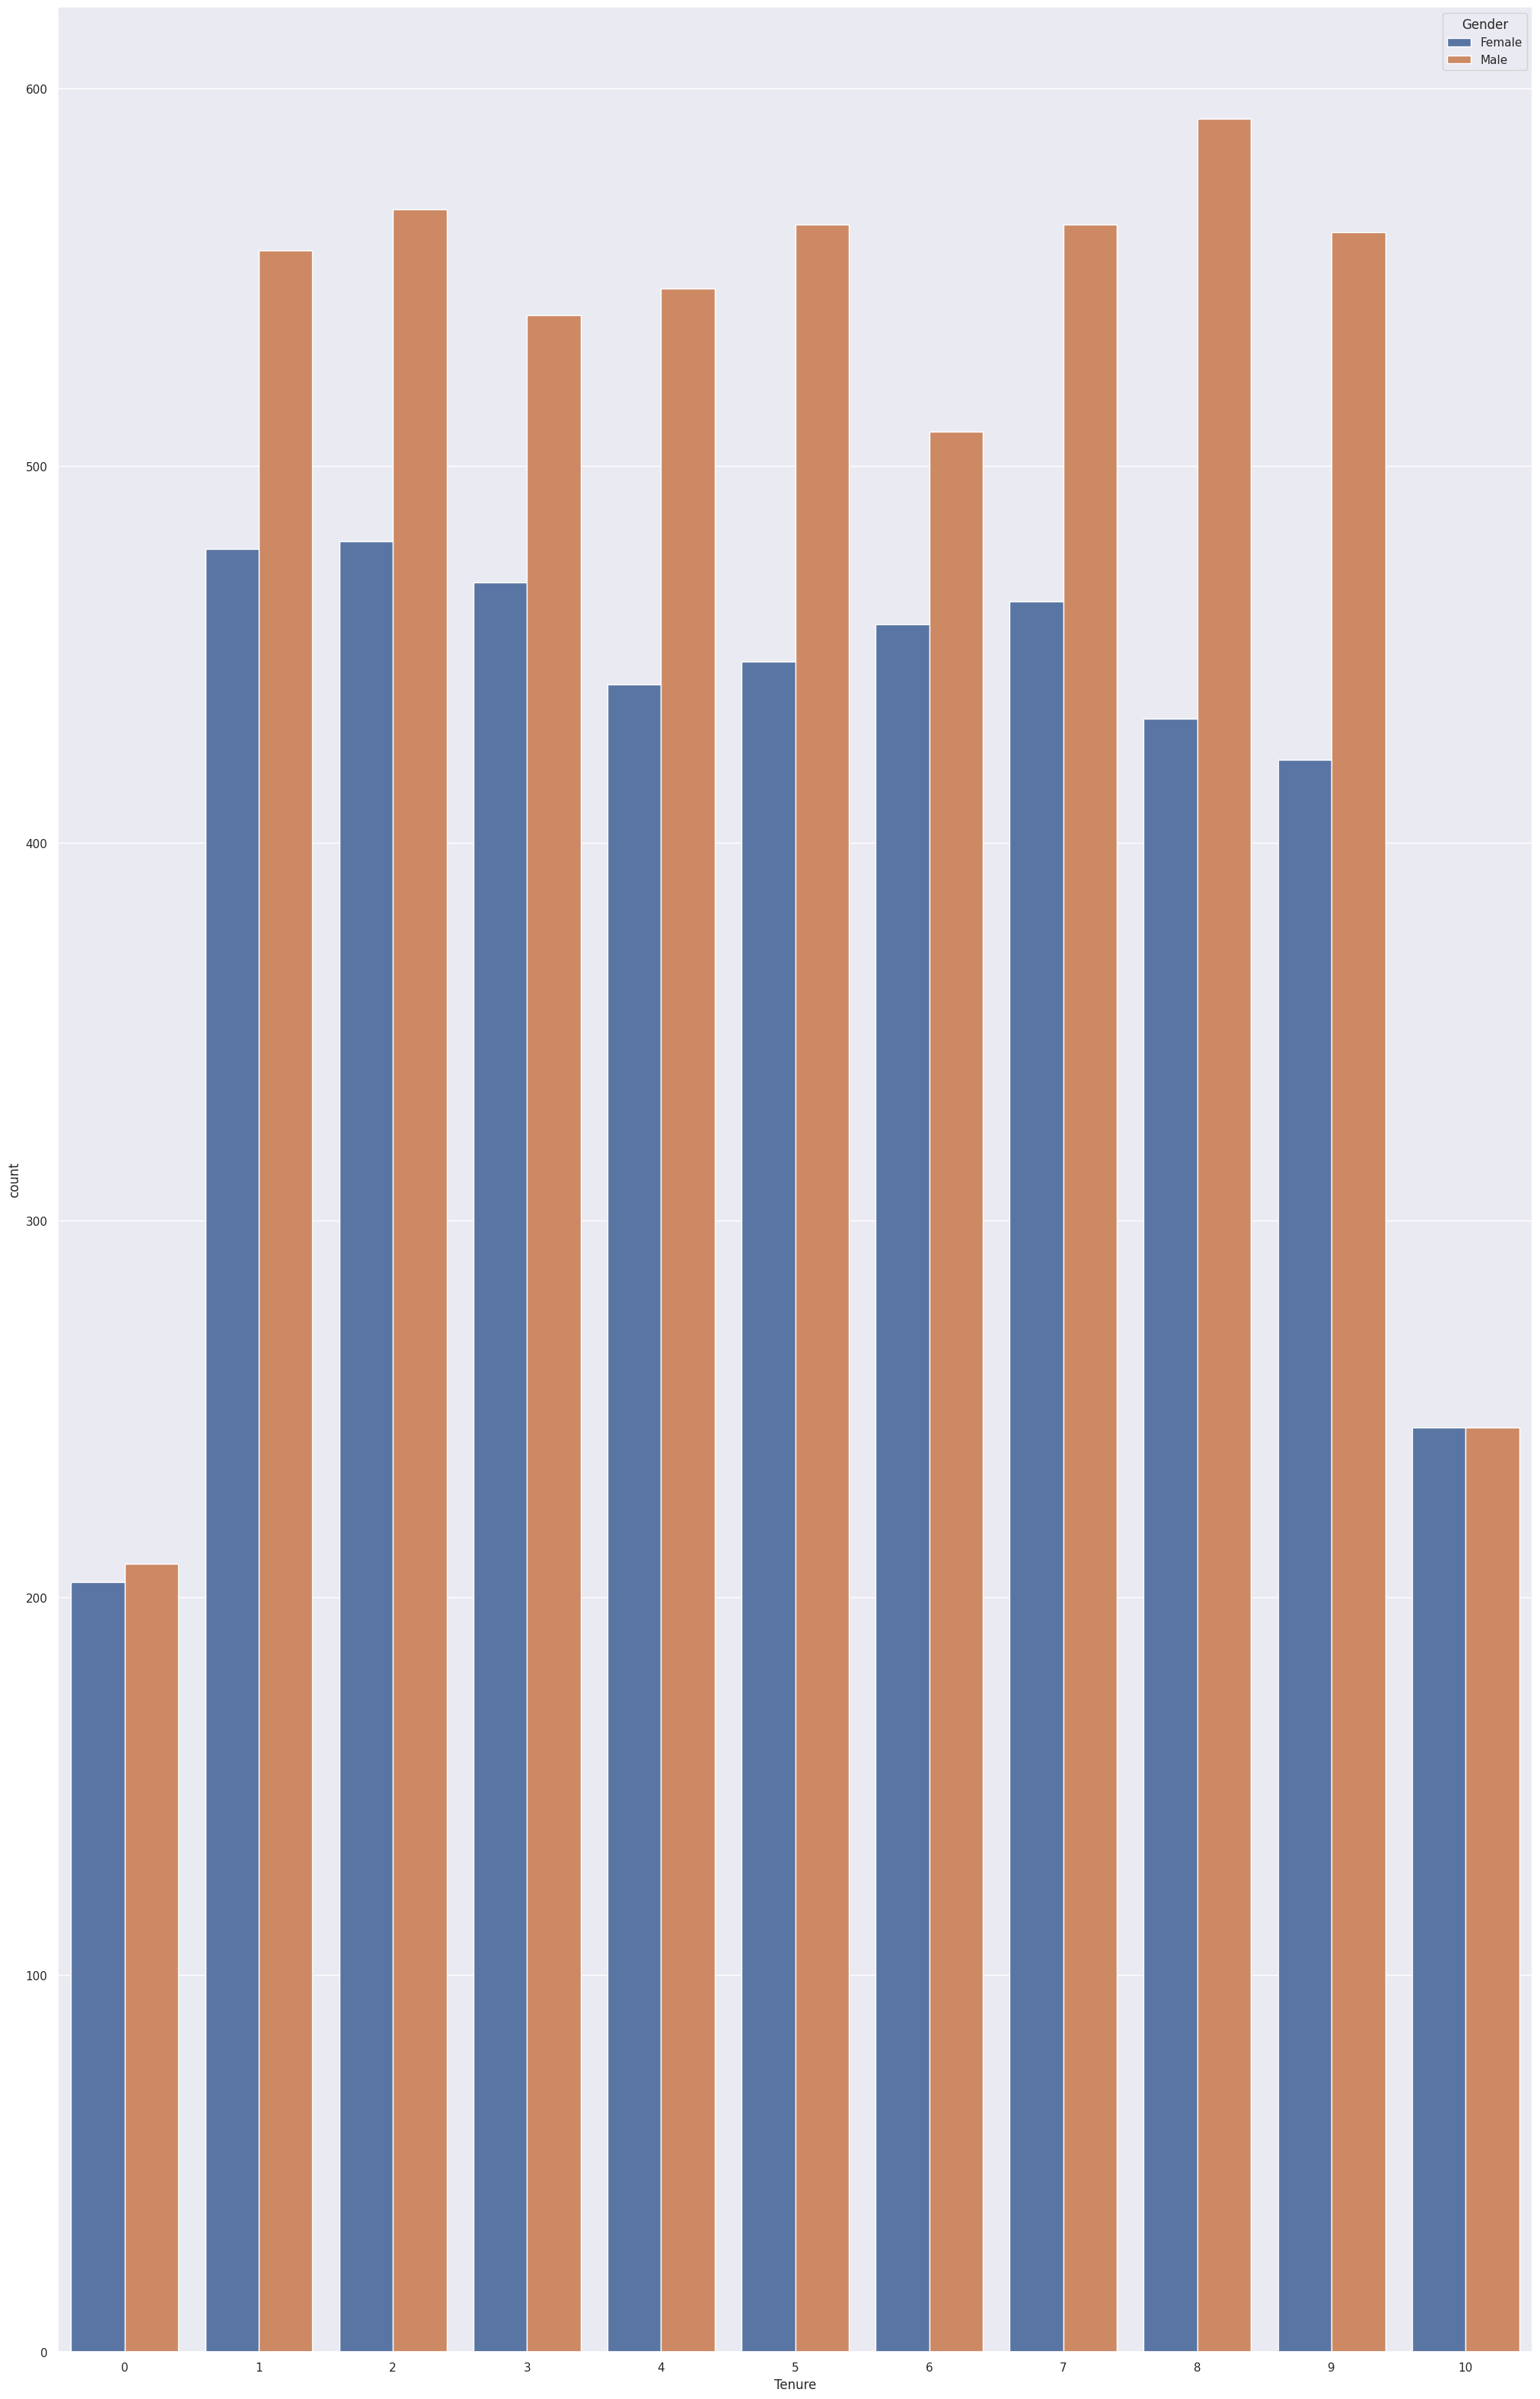

In [ ]:
sns.countplot(data=df, x='Tenure', hue='Gender')

<Axes: xlabel='Num Of Products', ylabel='Estimated Salary'>

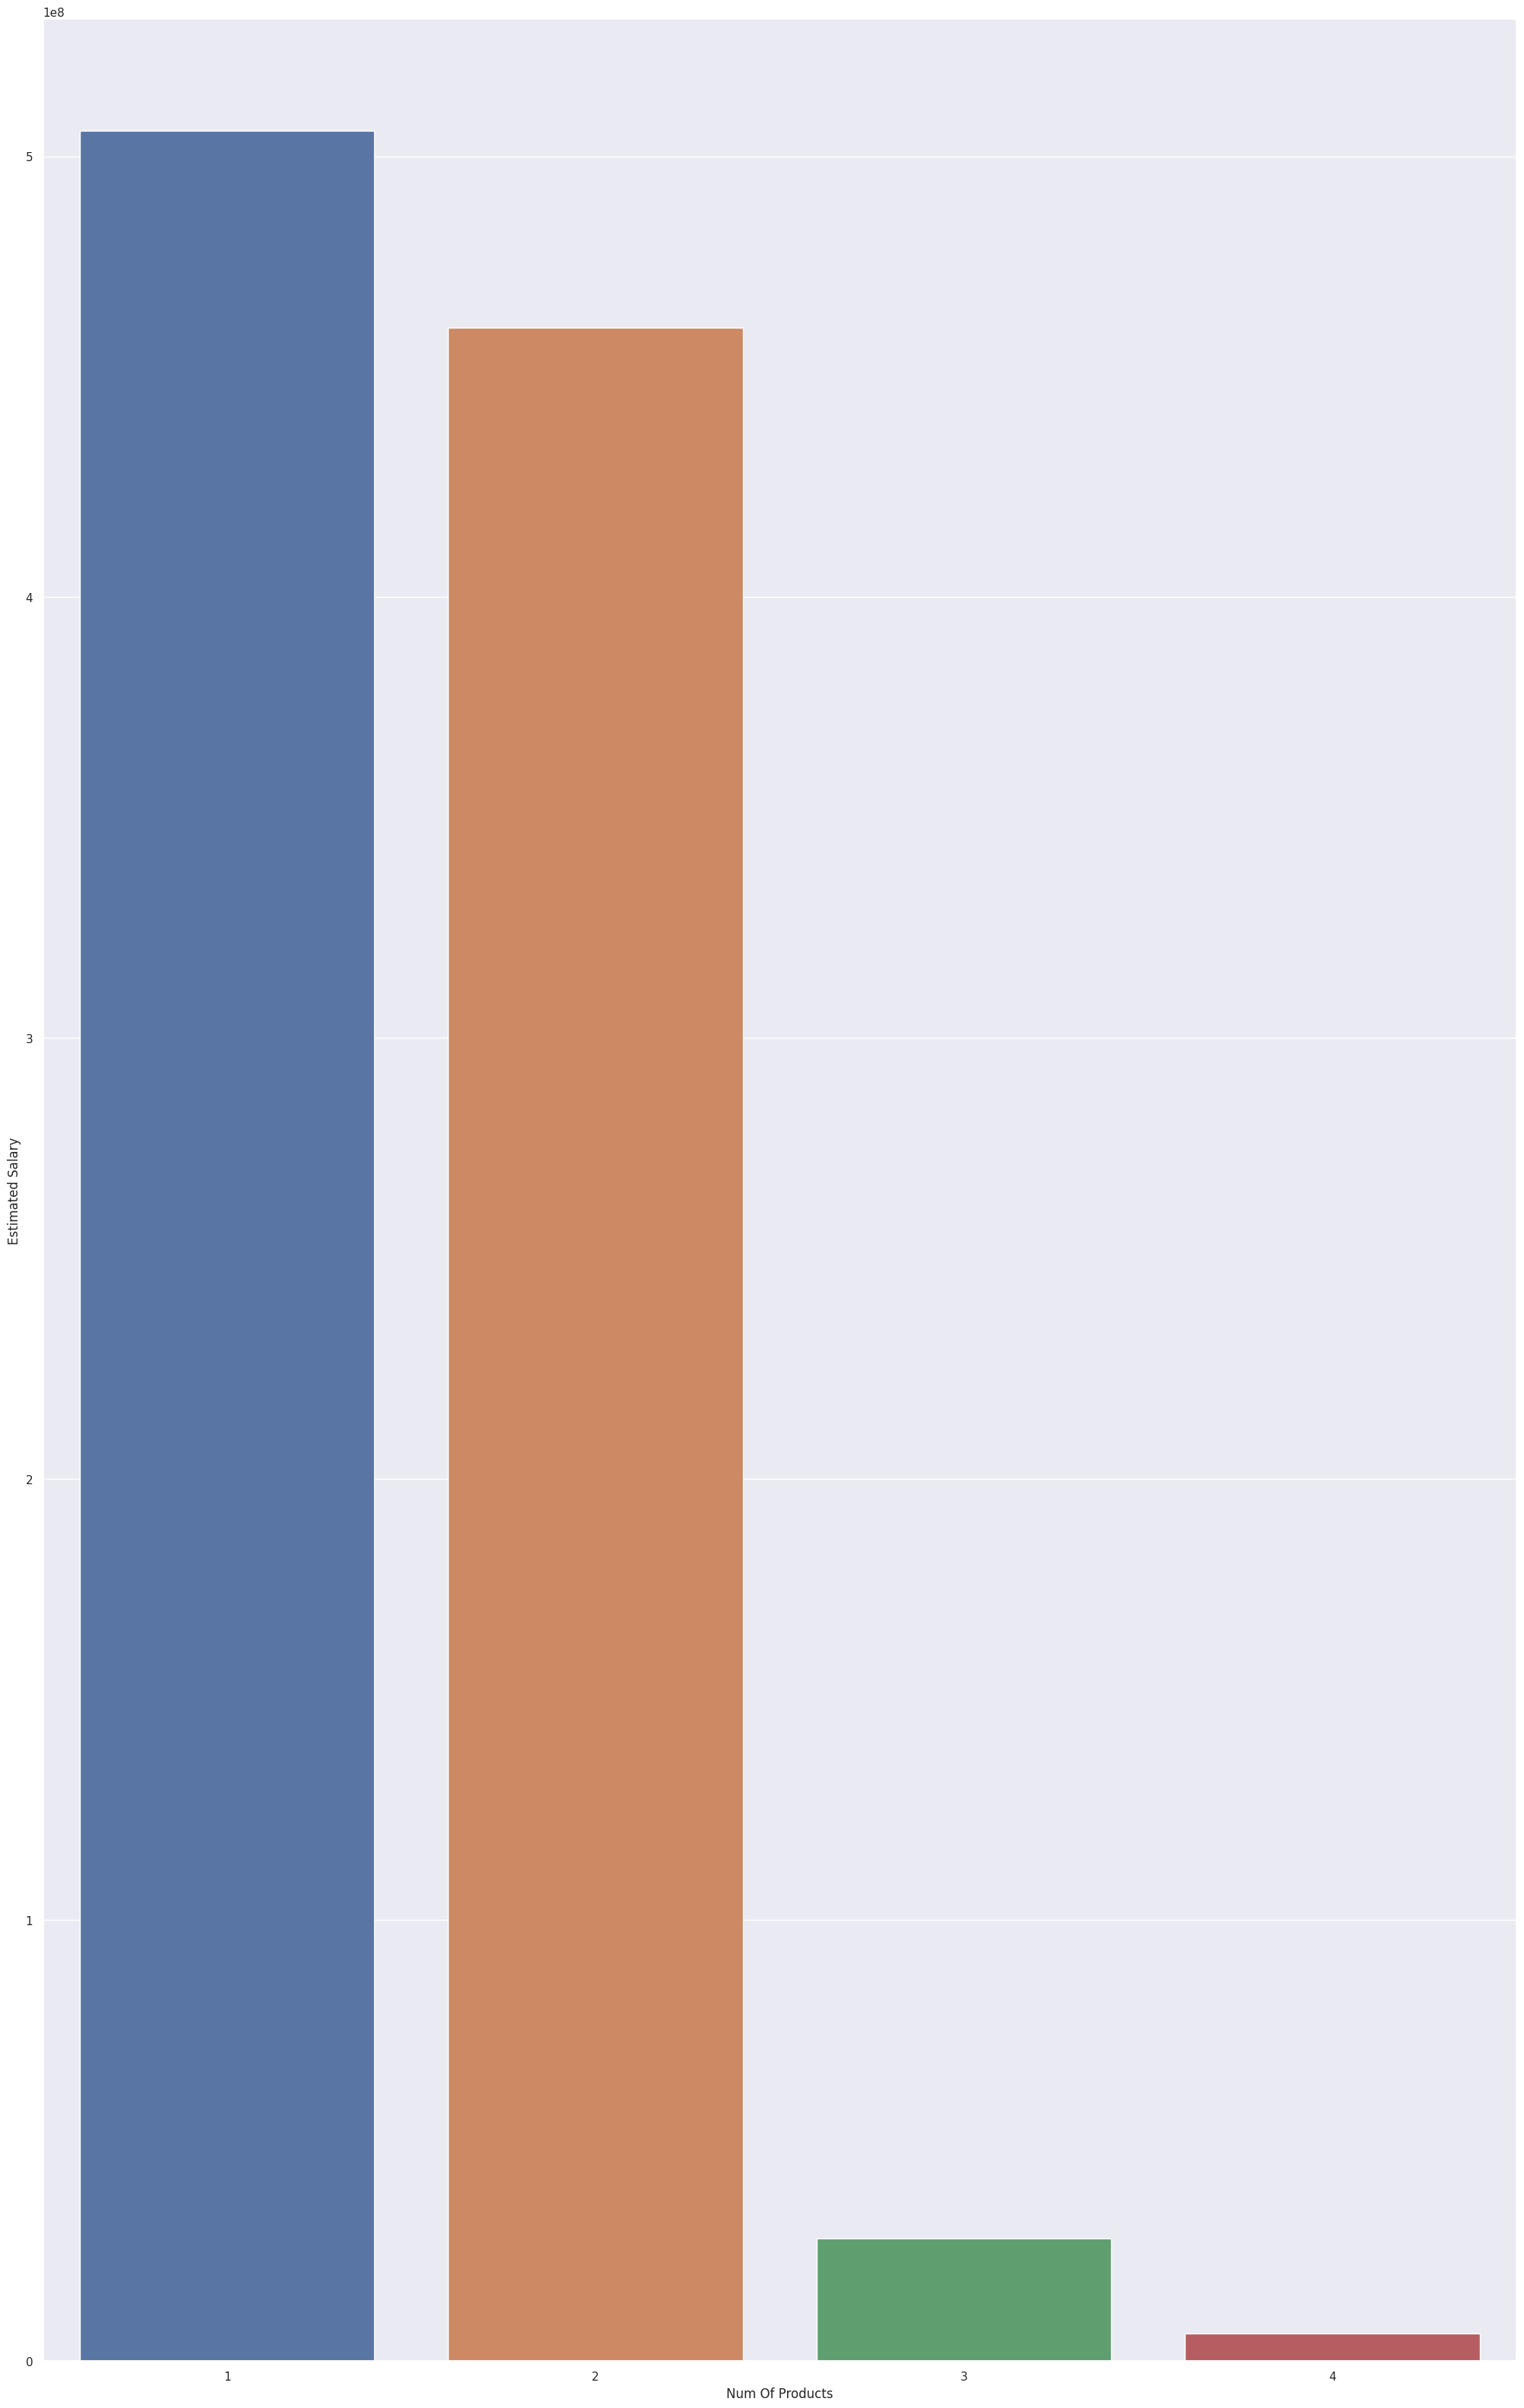

In [ ]:
sns.countplot(x='Num Of Products',data=df)
Bank_Customer = df.groupby(['Num Of Products'], as_index=False)['Estimated Salary'].sum().sort_values(by='Estimated Salary', ascending=False)
sns.barplot(x ='Num Of Products',y= 'Estimated Salary' ,data = Bank_Customer)

<Axes: xlabel='Num Of Products', ylabel='count'>

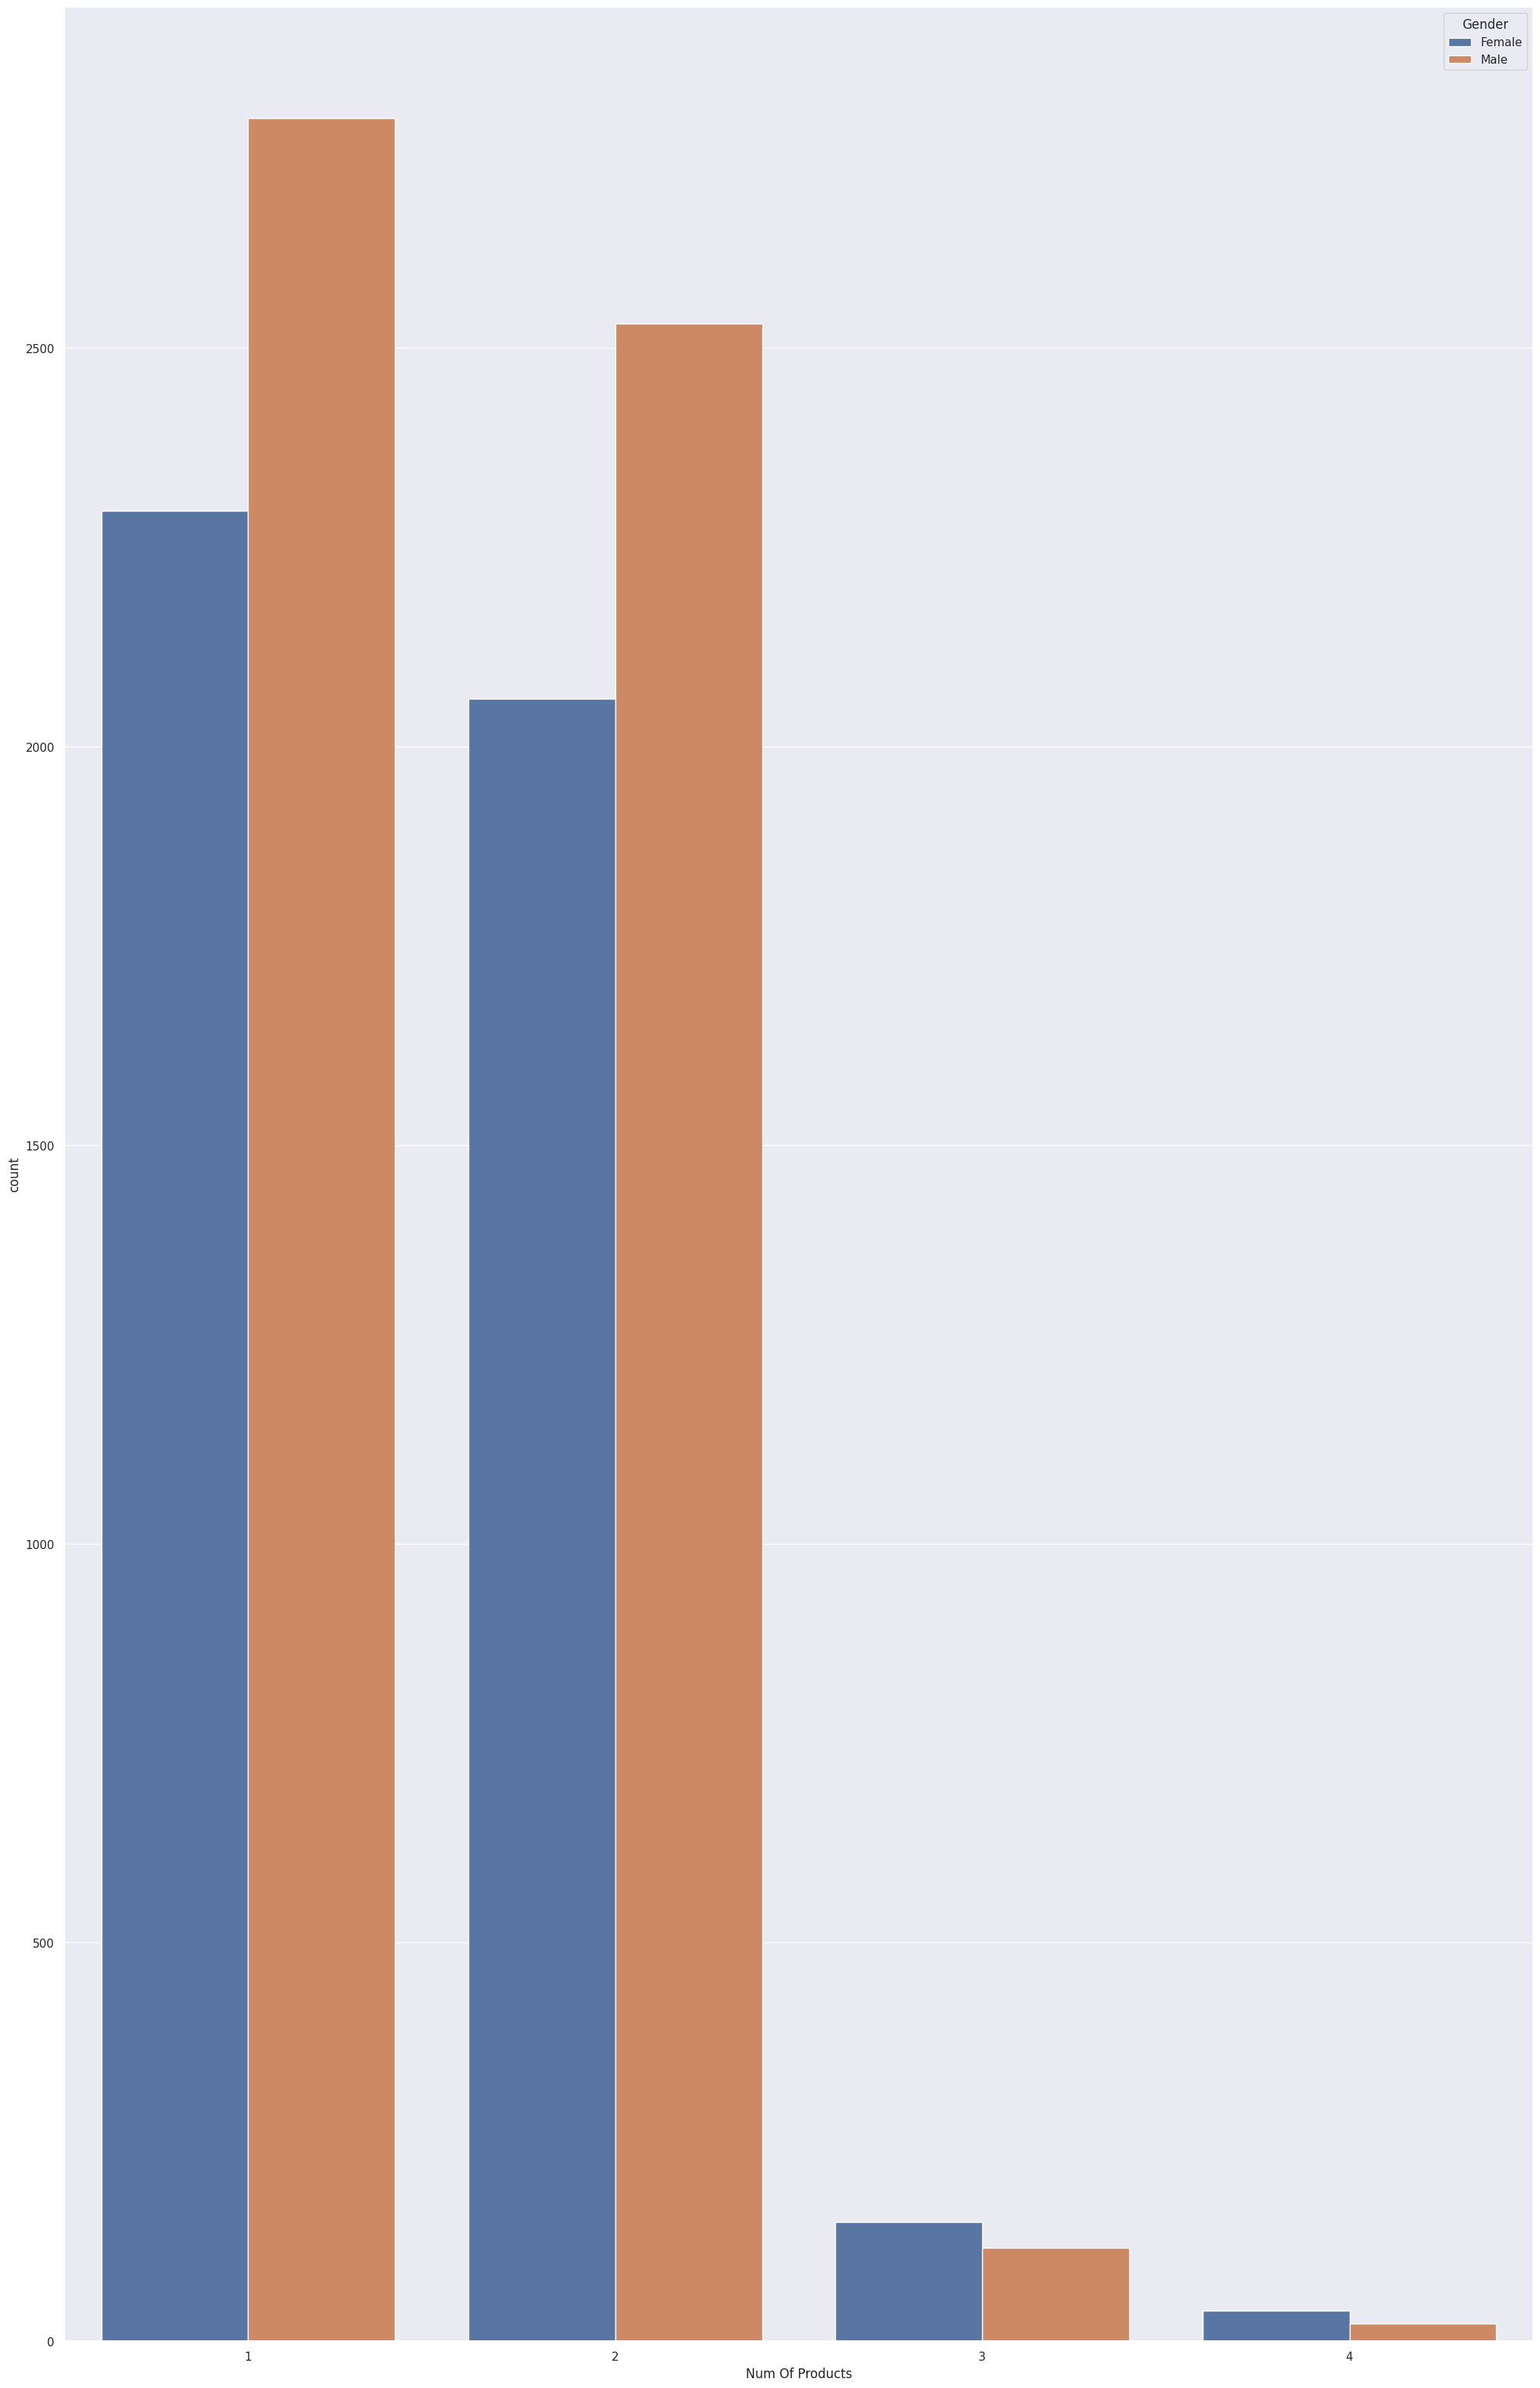

In [ ]:
sns.countplot(data=df, x='Num Of Products', hue='Gender')

<Axes: xlabel='Has Credit Card', ylabel='Estimated Salary'>

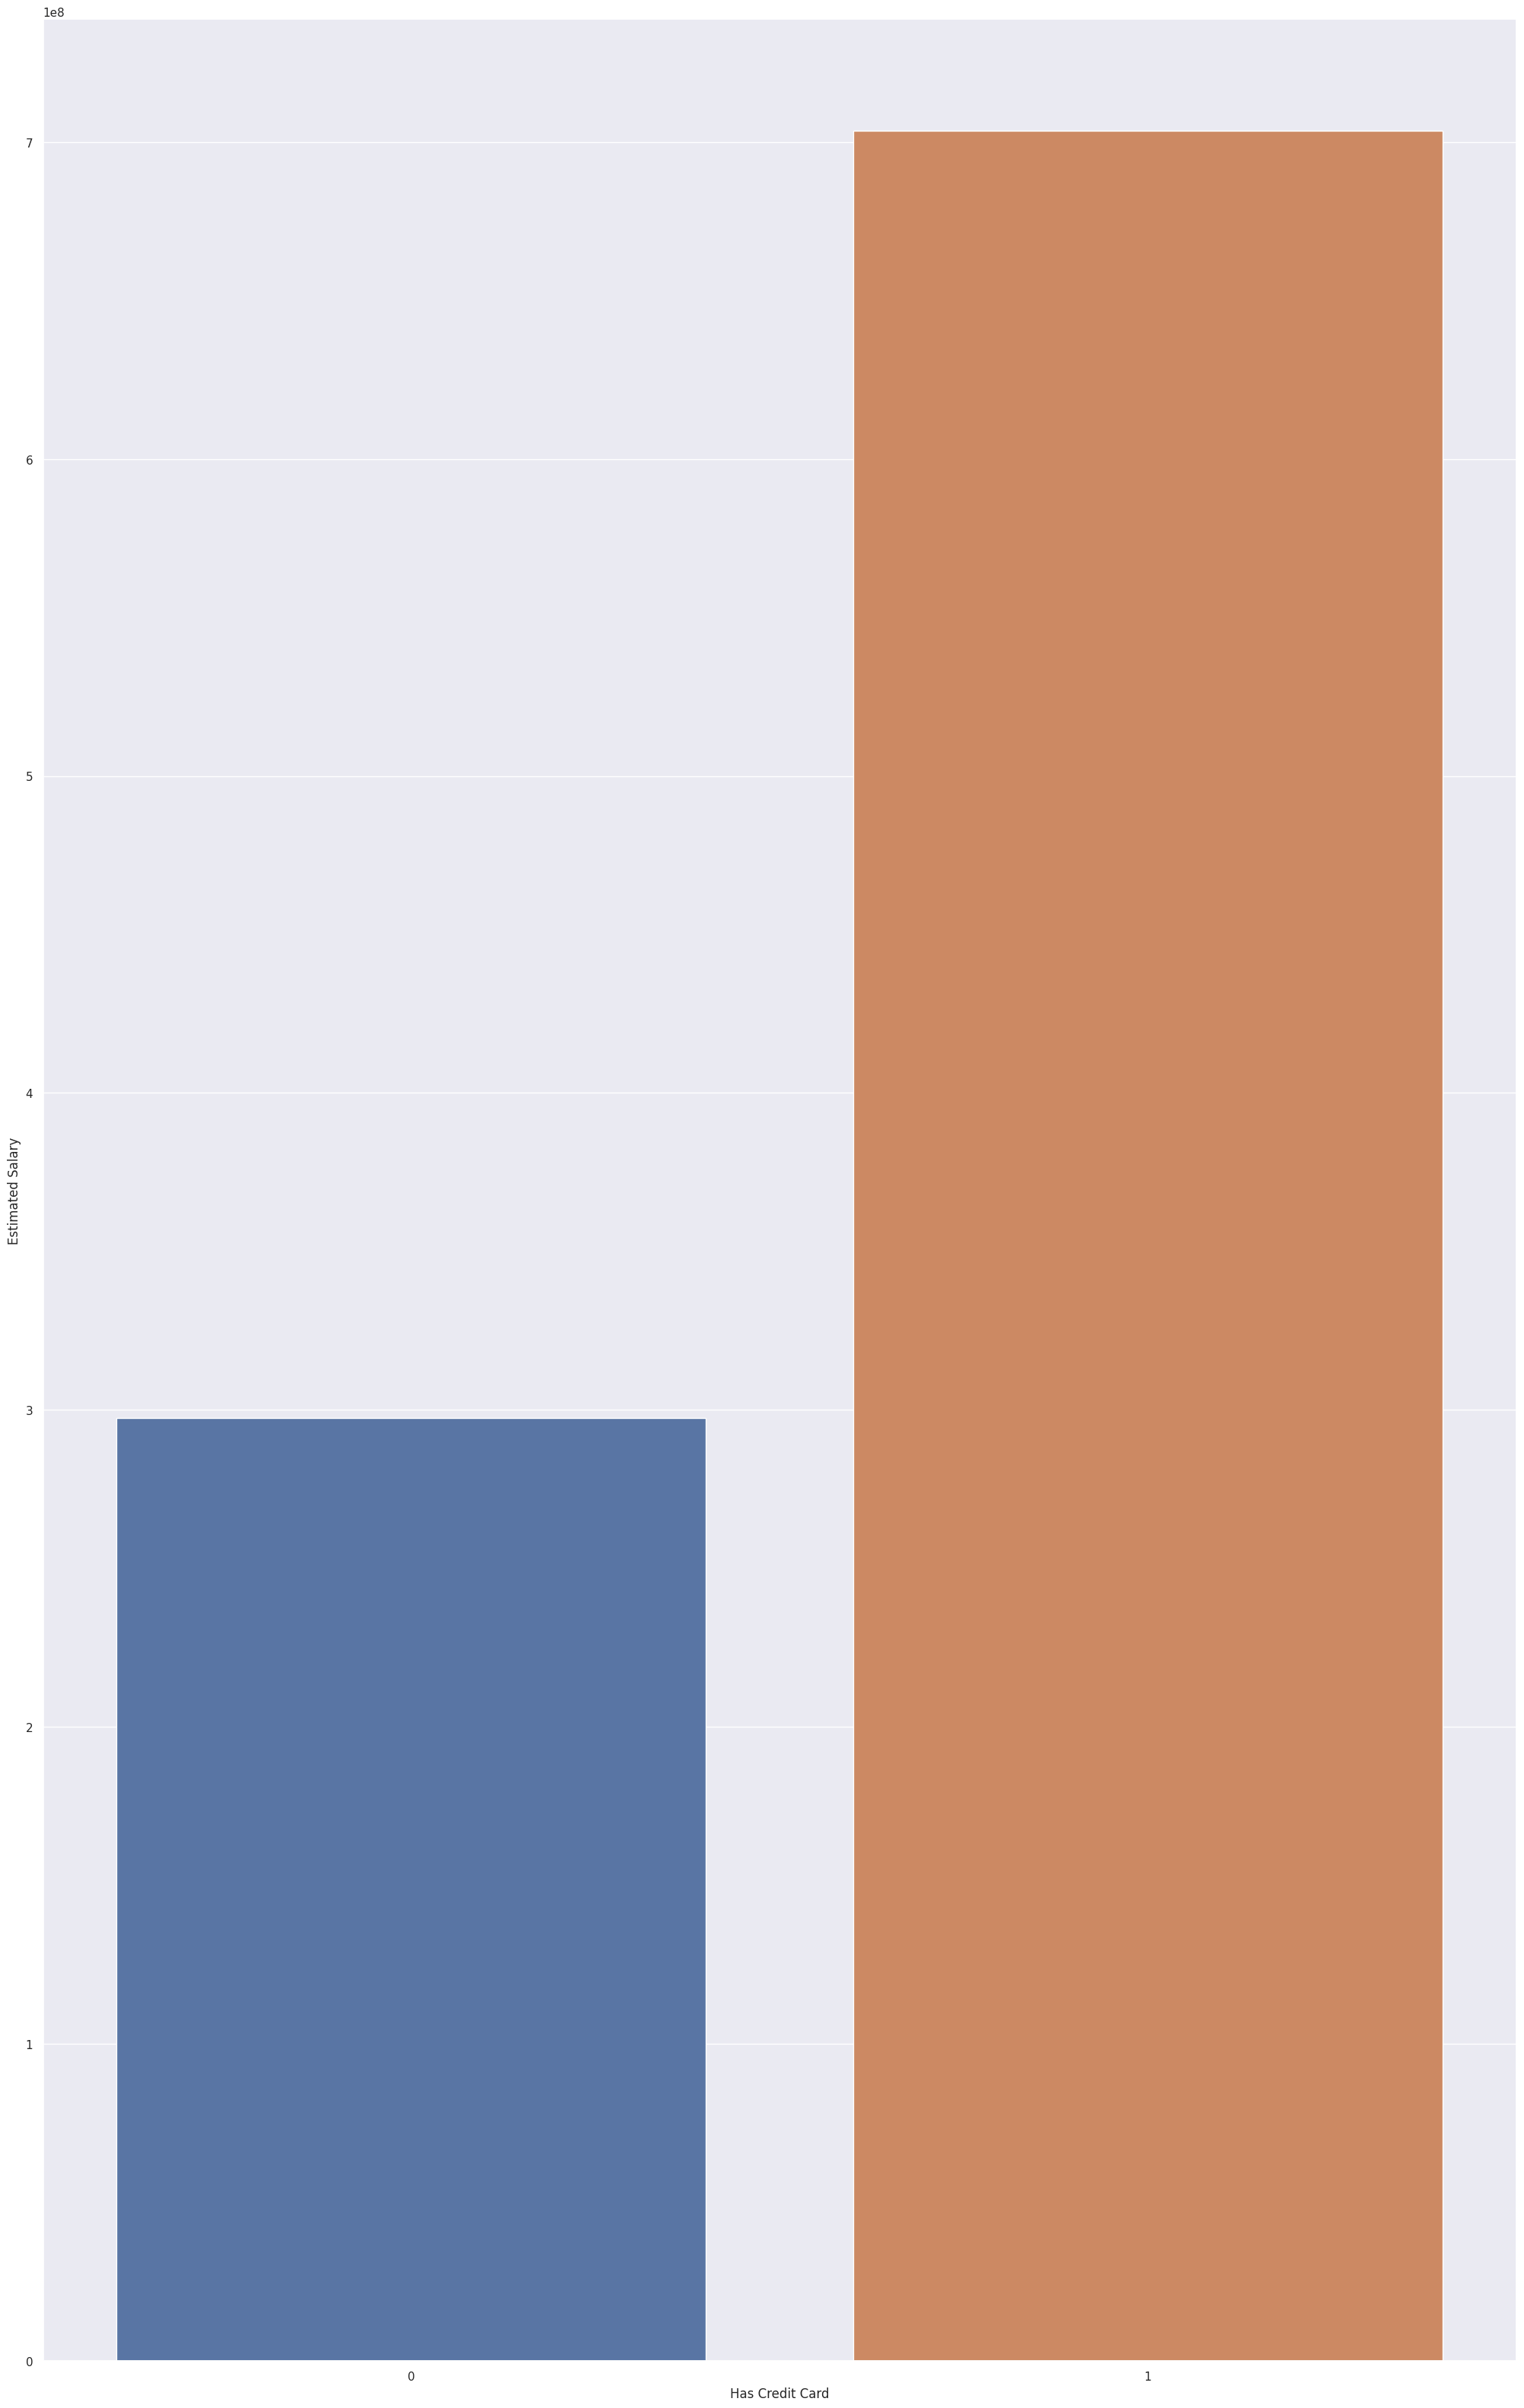

In [ ]:
sns.countplot(x='Has Credit Card',data=df)
Bank_Customer = df.groupby(['Has Credit Card'], as_index=False)['Estimated Salary'].sum().sort_values(by='Estimated Salary', ascending=False)
sns.barplot(x ='Has Credit Card',y= 'Estimated Salary' ,data = Bank_Customer)

<Axes: xlabel='Has Credit Card', ylabel='count'>

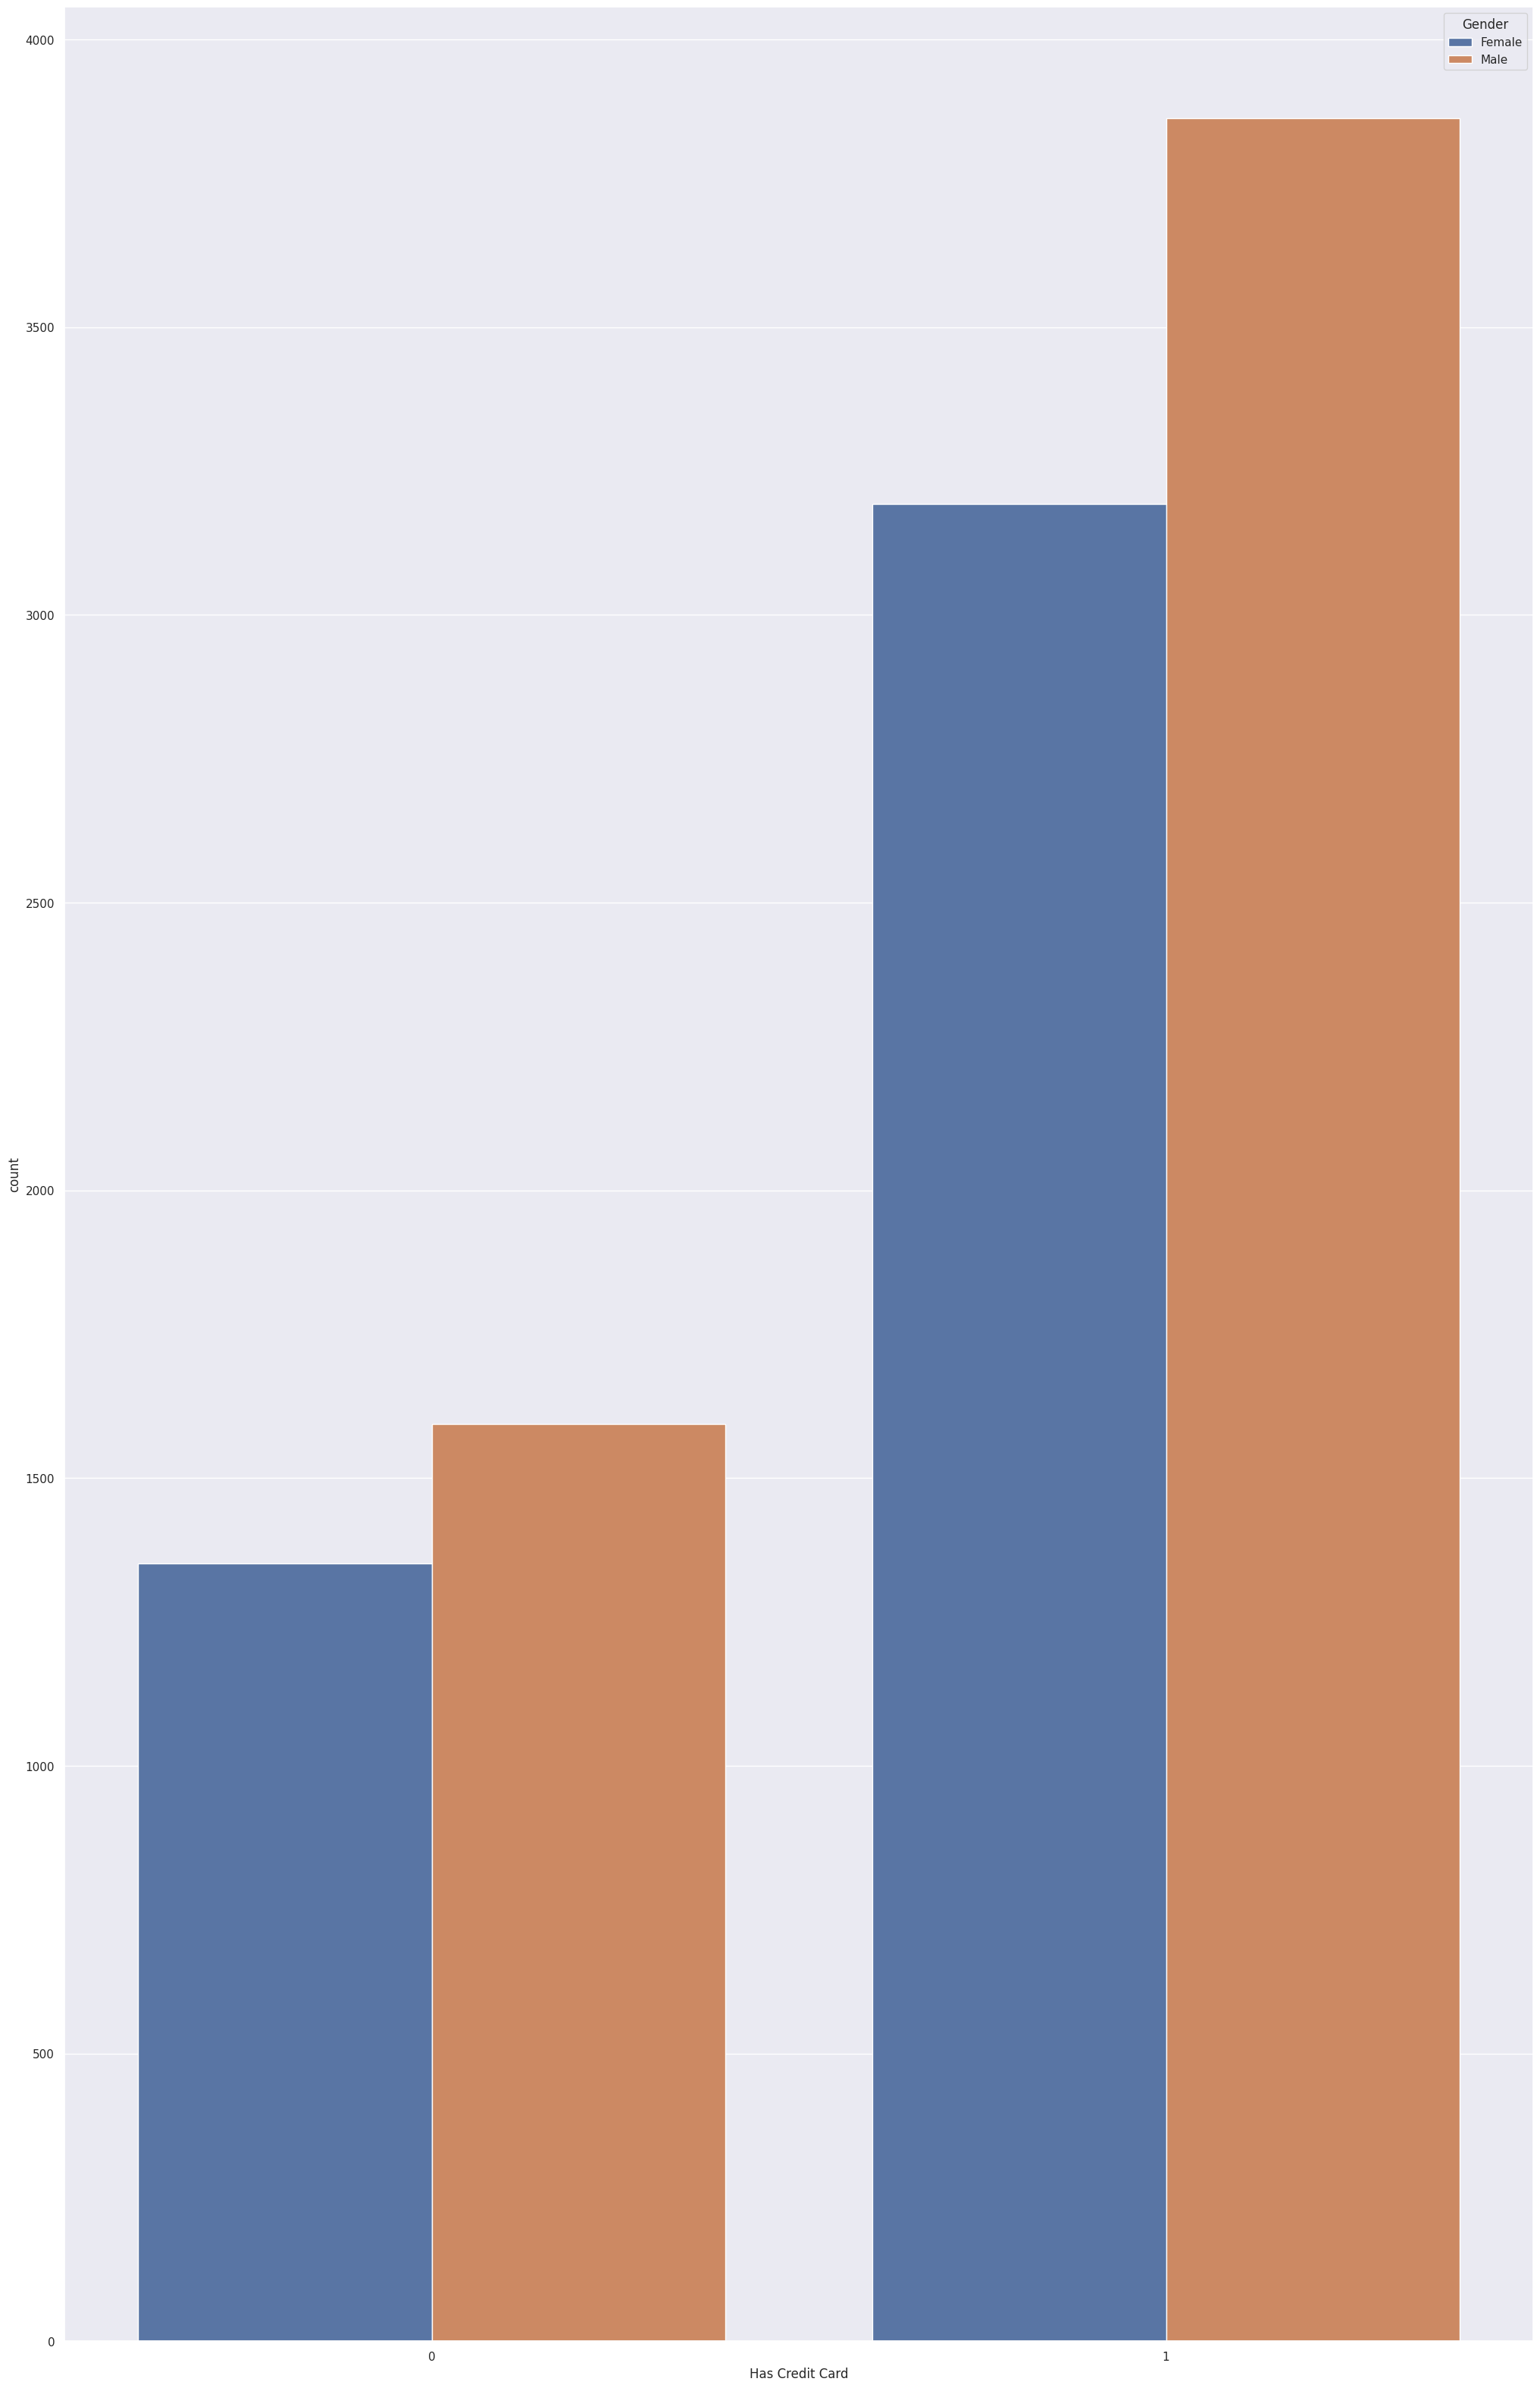

In [ ]:
sns.countplot(data=df, x='Has Credit Card', hue='Gender')

<Axes: xlabel='Is Active Member', ylabel='Estimated Salary'>

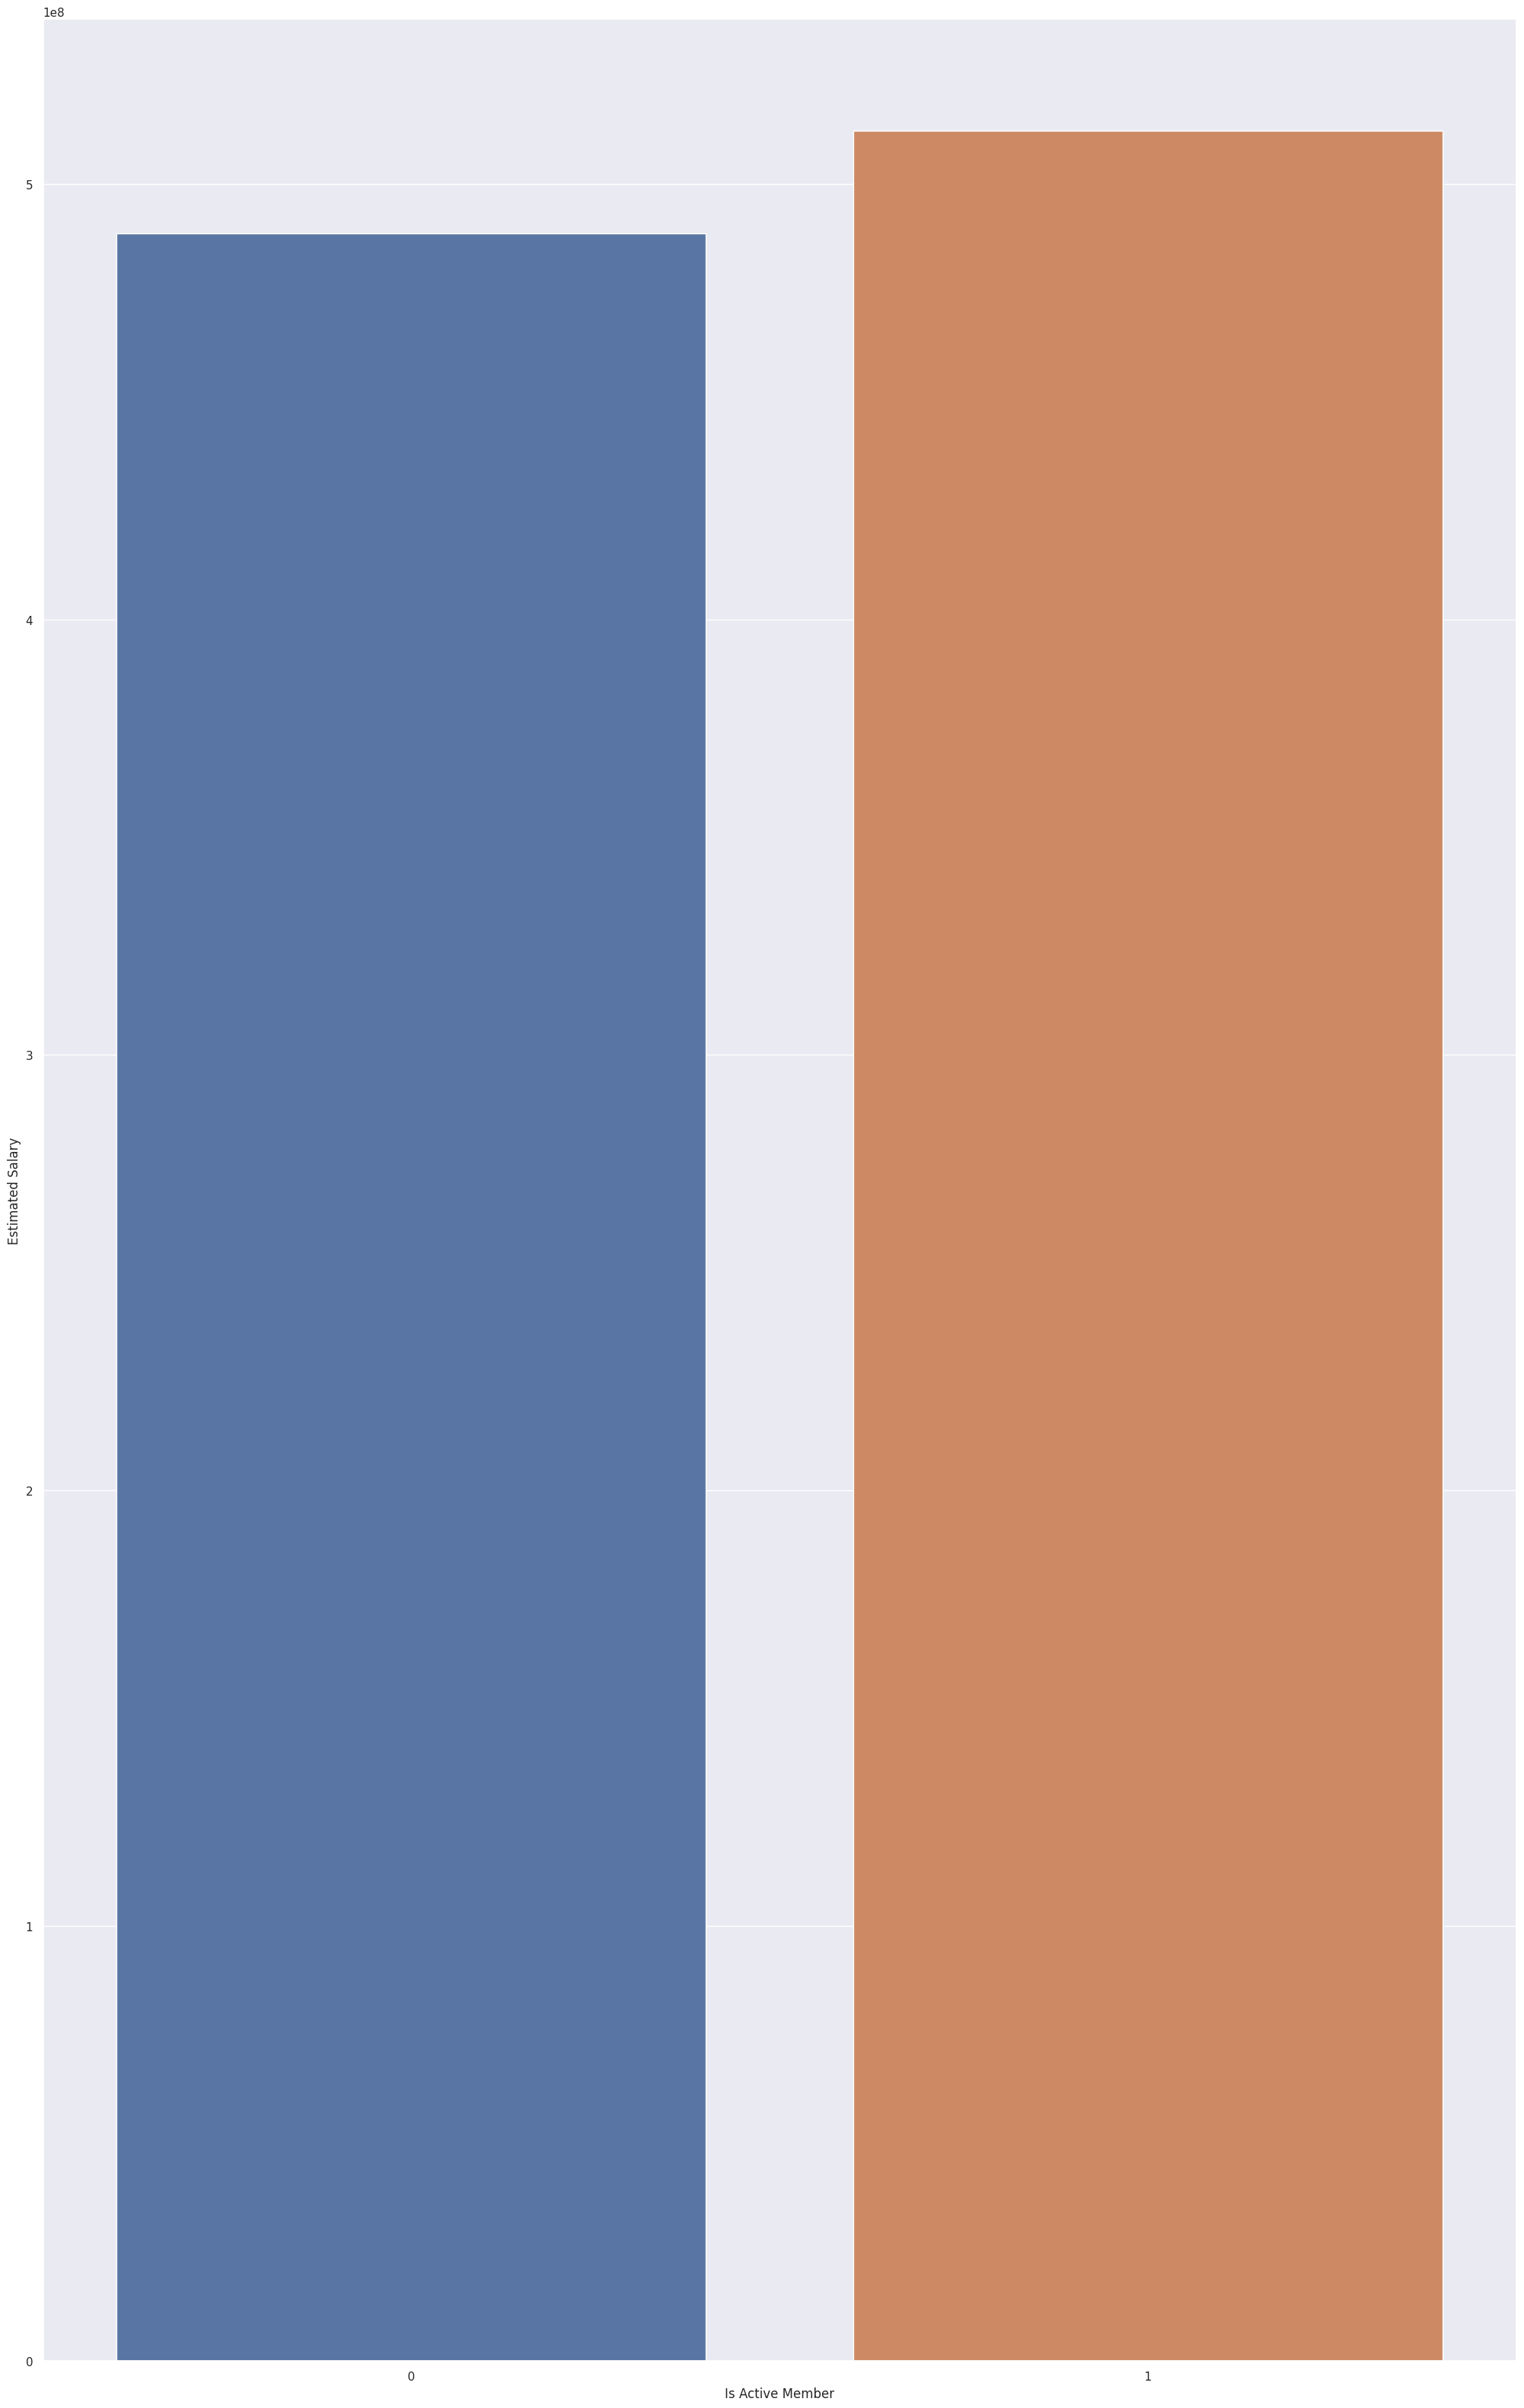

In [ ]:
sns.countplot(x='Is Active Member',data=df)
Bank_Customer = df.groupby(['Is Active Member'], as_index=False)['Estimated Salary'].sum().sort_values(by='Estimated Salary', ascending=False)
sns.barplot(x ='Is Active Member',y= 'Estimated Salary' ,data = Bank_Customer)

<Axes: xlabel='Is Active Member', ylabel='count'>

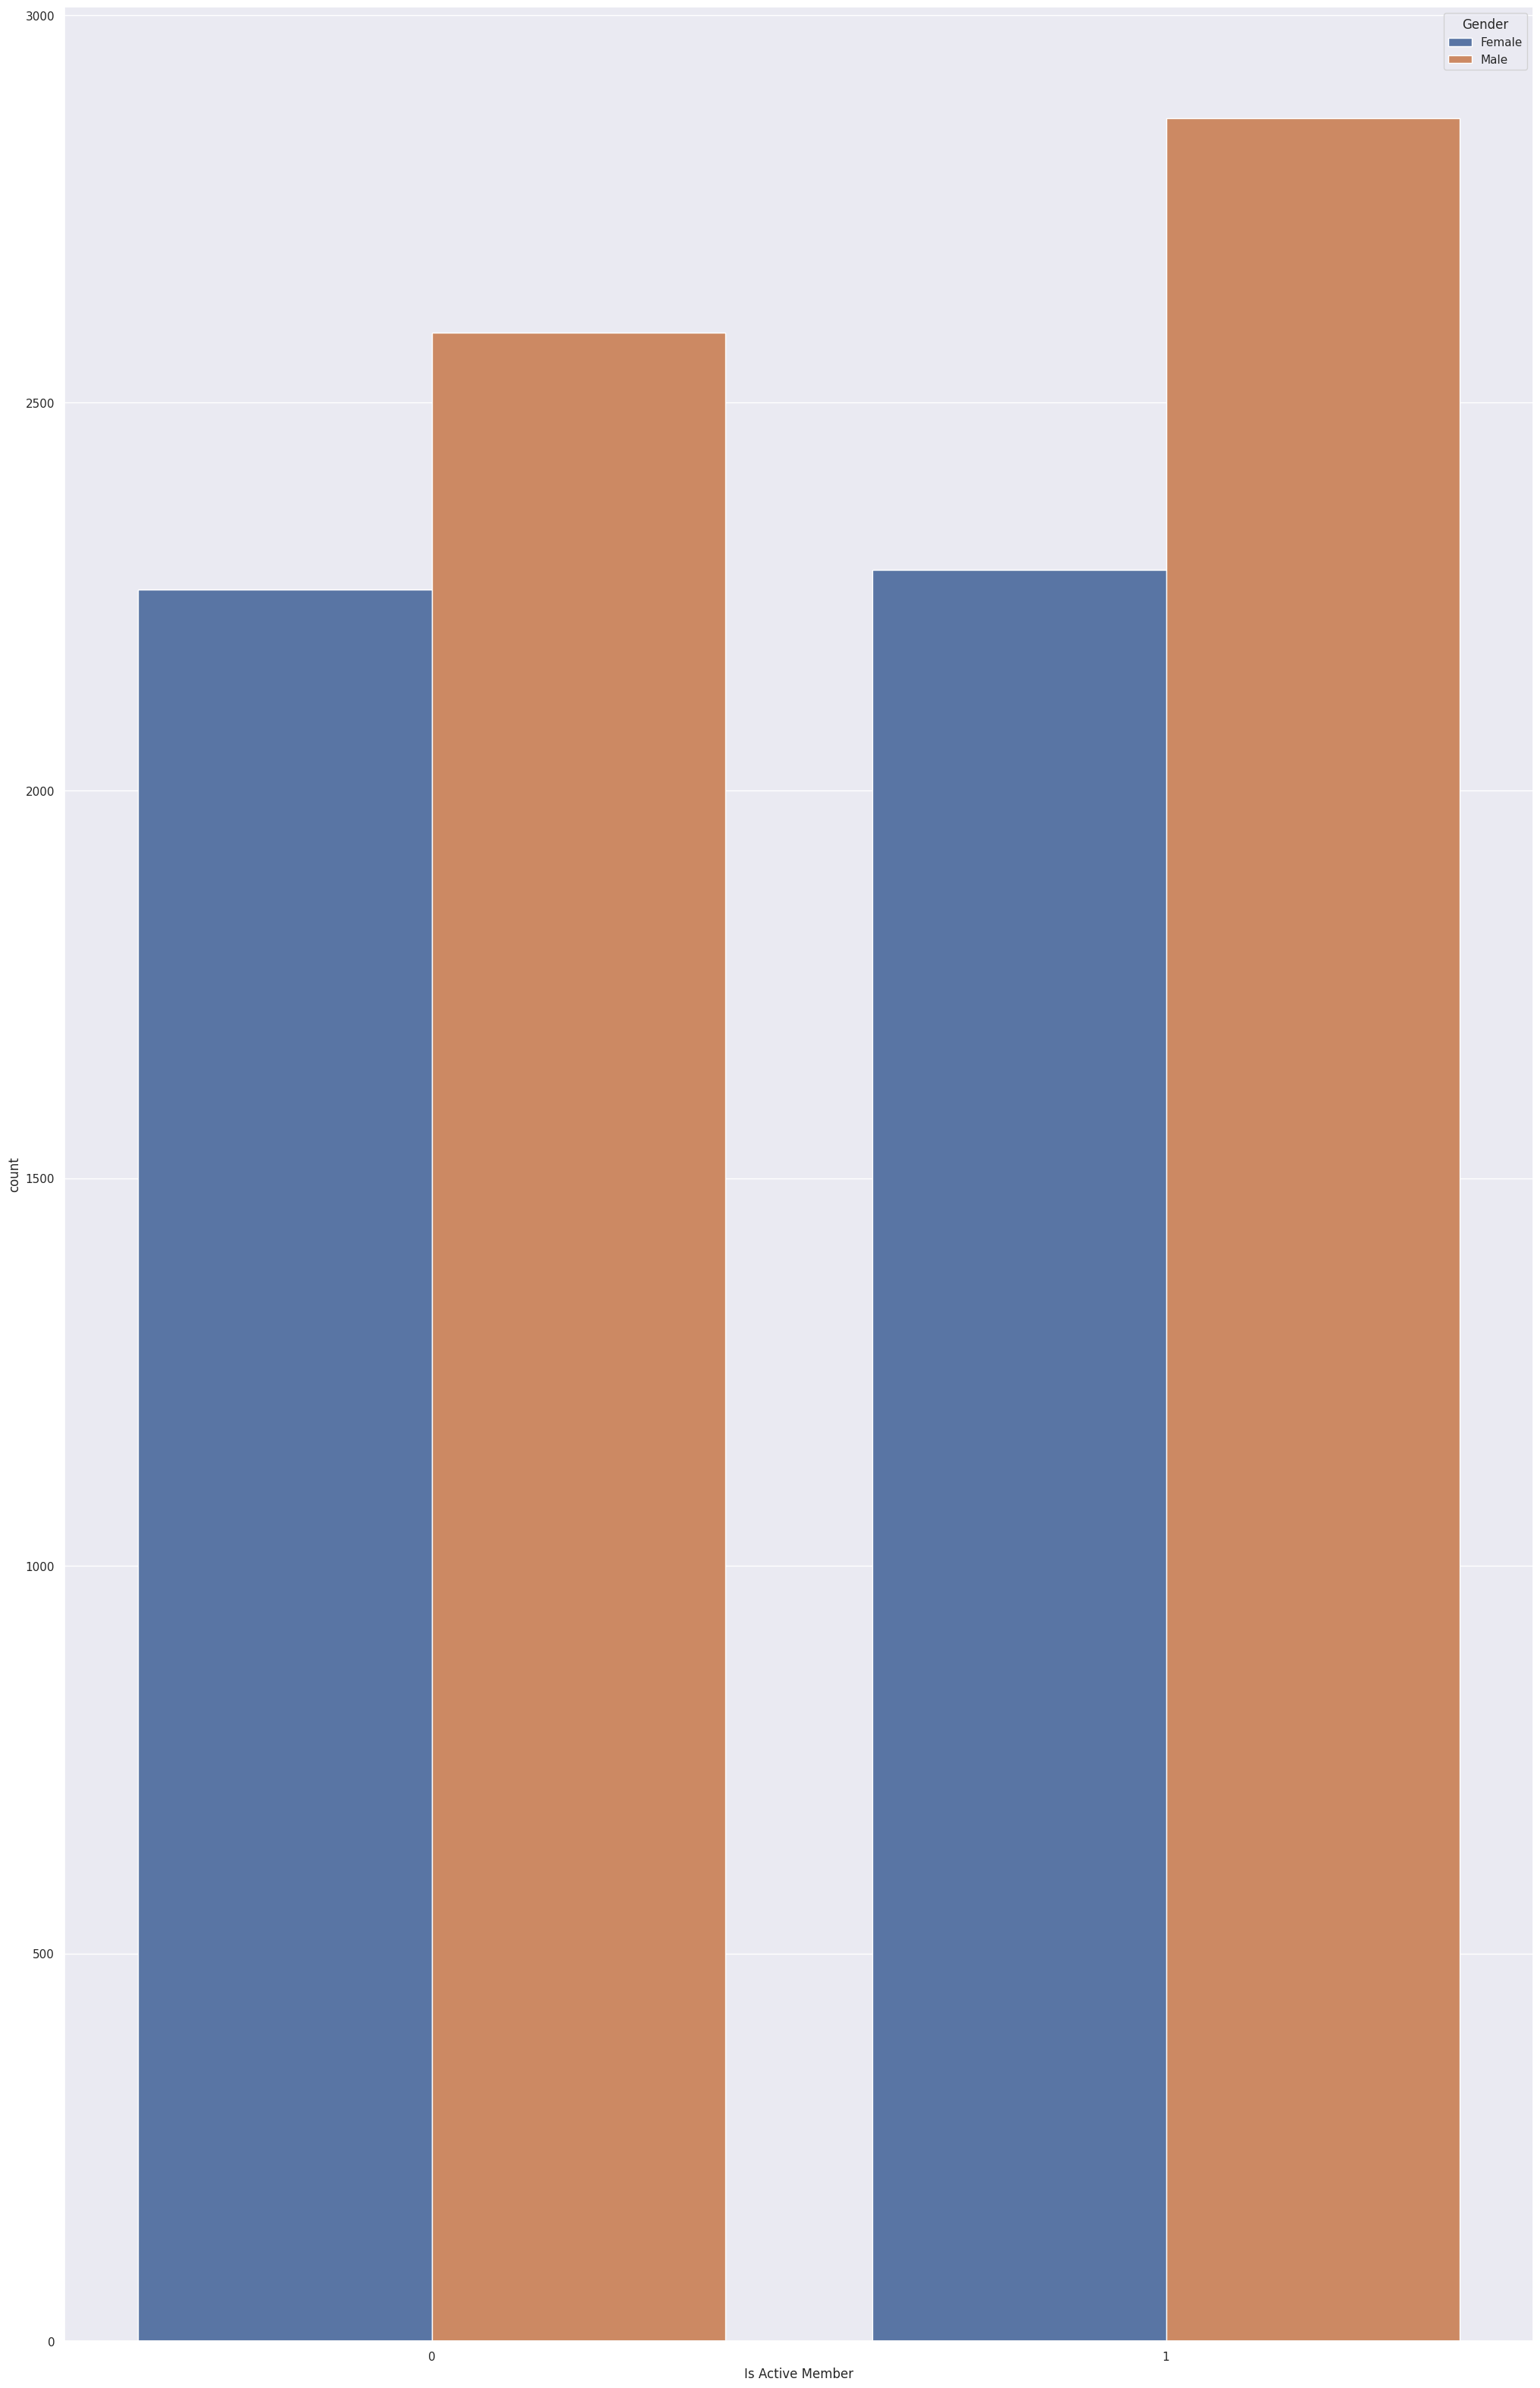

In [ ]:
sns.countplot(data=df, x='Is Active Member', hue='Gender')

<Axes: xlabel='Churn', ylabel='Estimated Salary'>

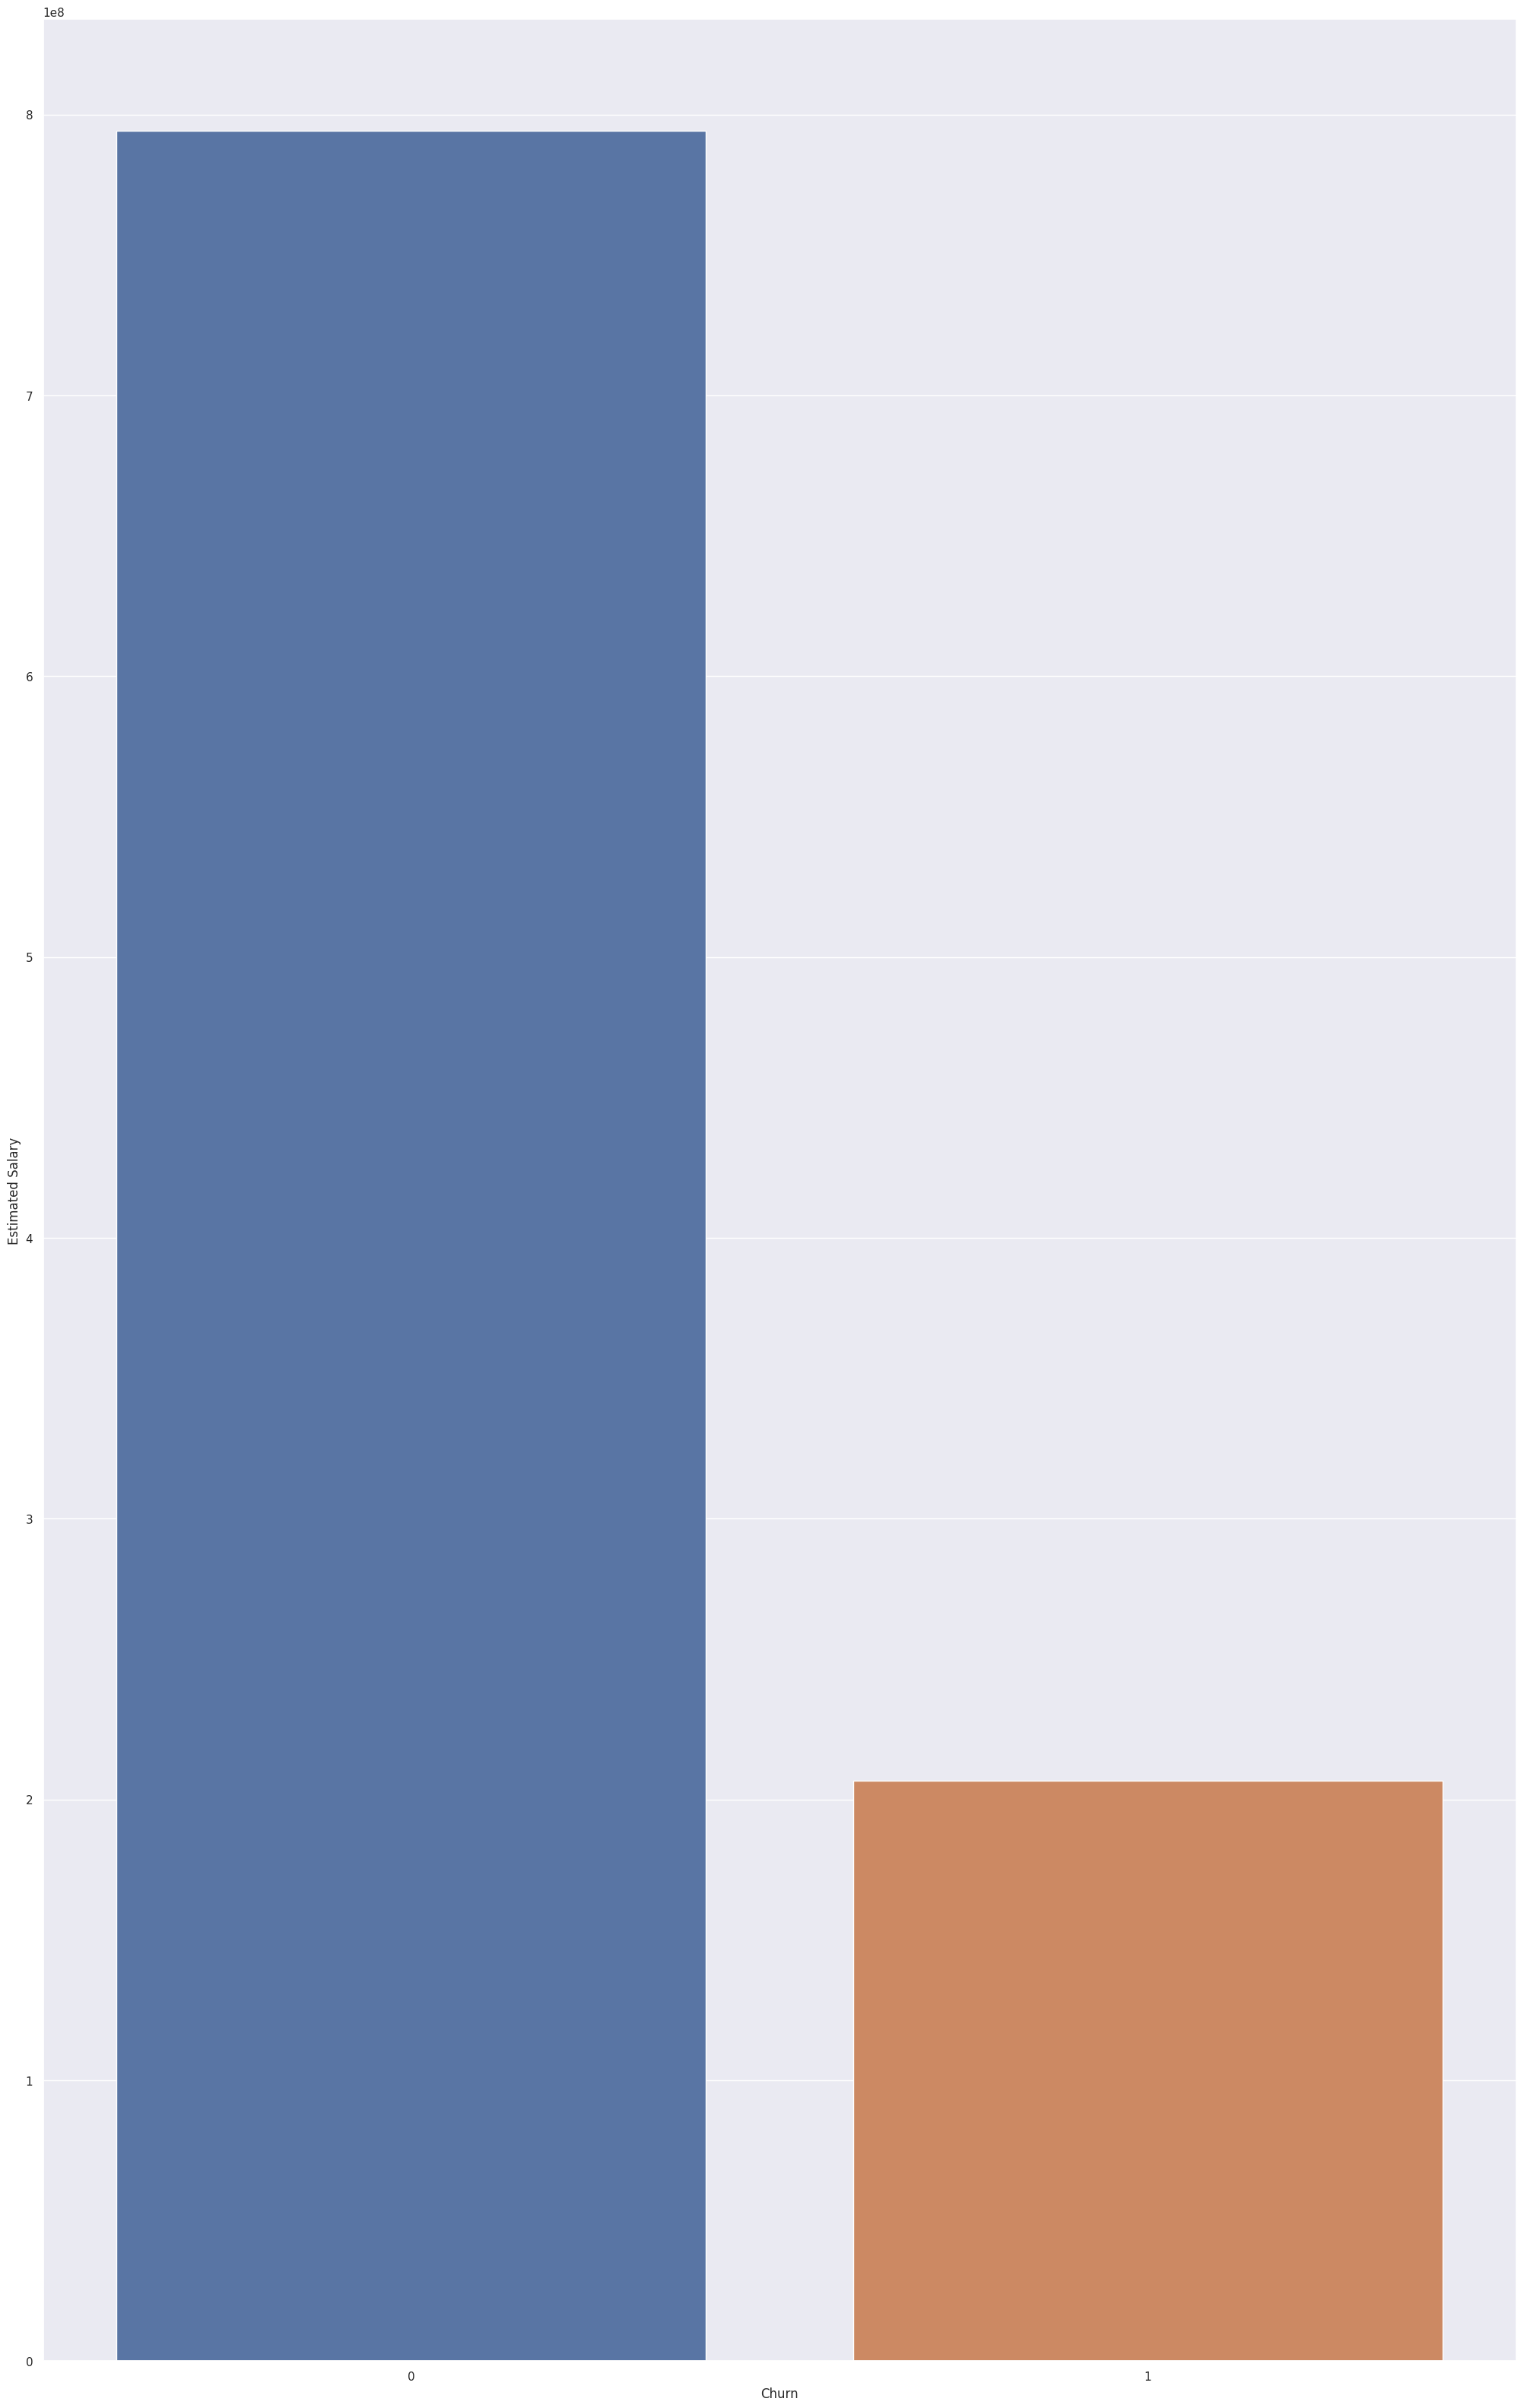

In [ ]:
sns.countplot(x='Churn',data=df)
Bank_Customer = df.groupby(['Churn'], as_index=False)['Estimated Salary'].sum().sort_values(by='Estimated Salary', ascending=False)
sns.barplot(x ='Churn',y= 'Estimated Salary' ,data = Bank_Customer)

<Axes: xlabel='Churn', ylabel='count'>

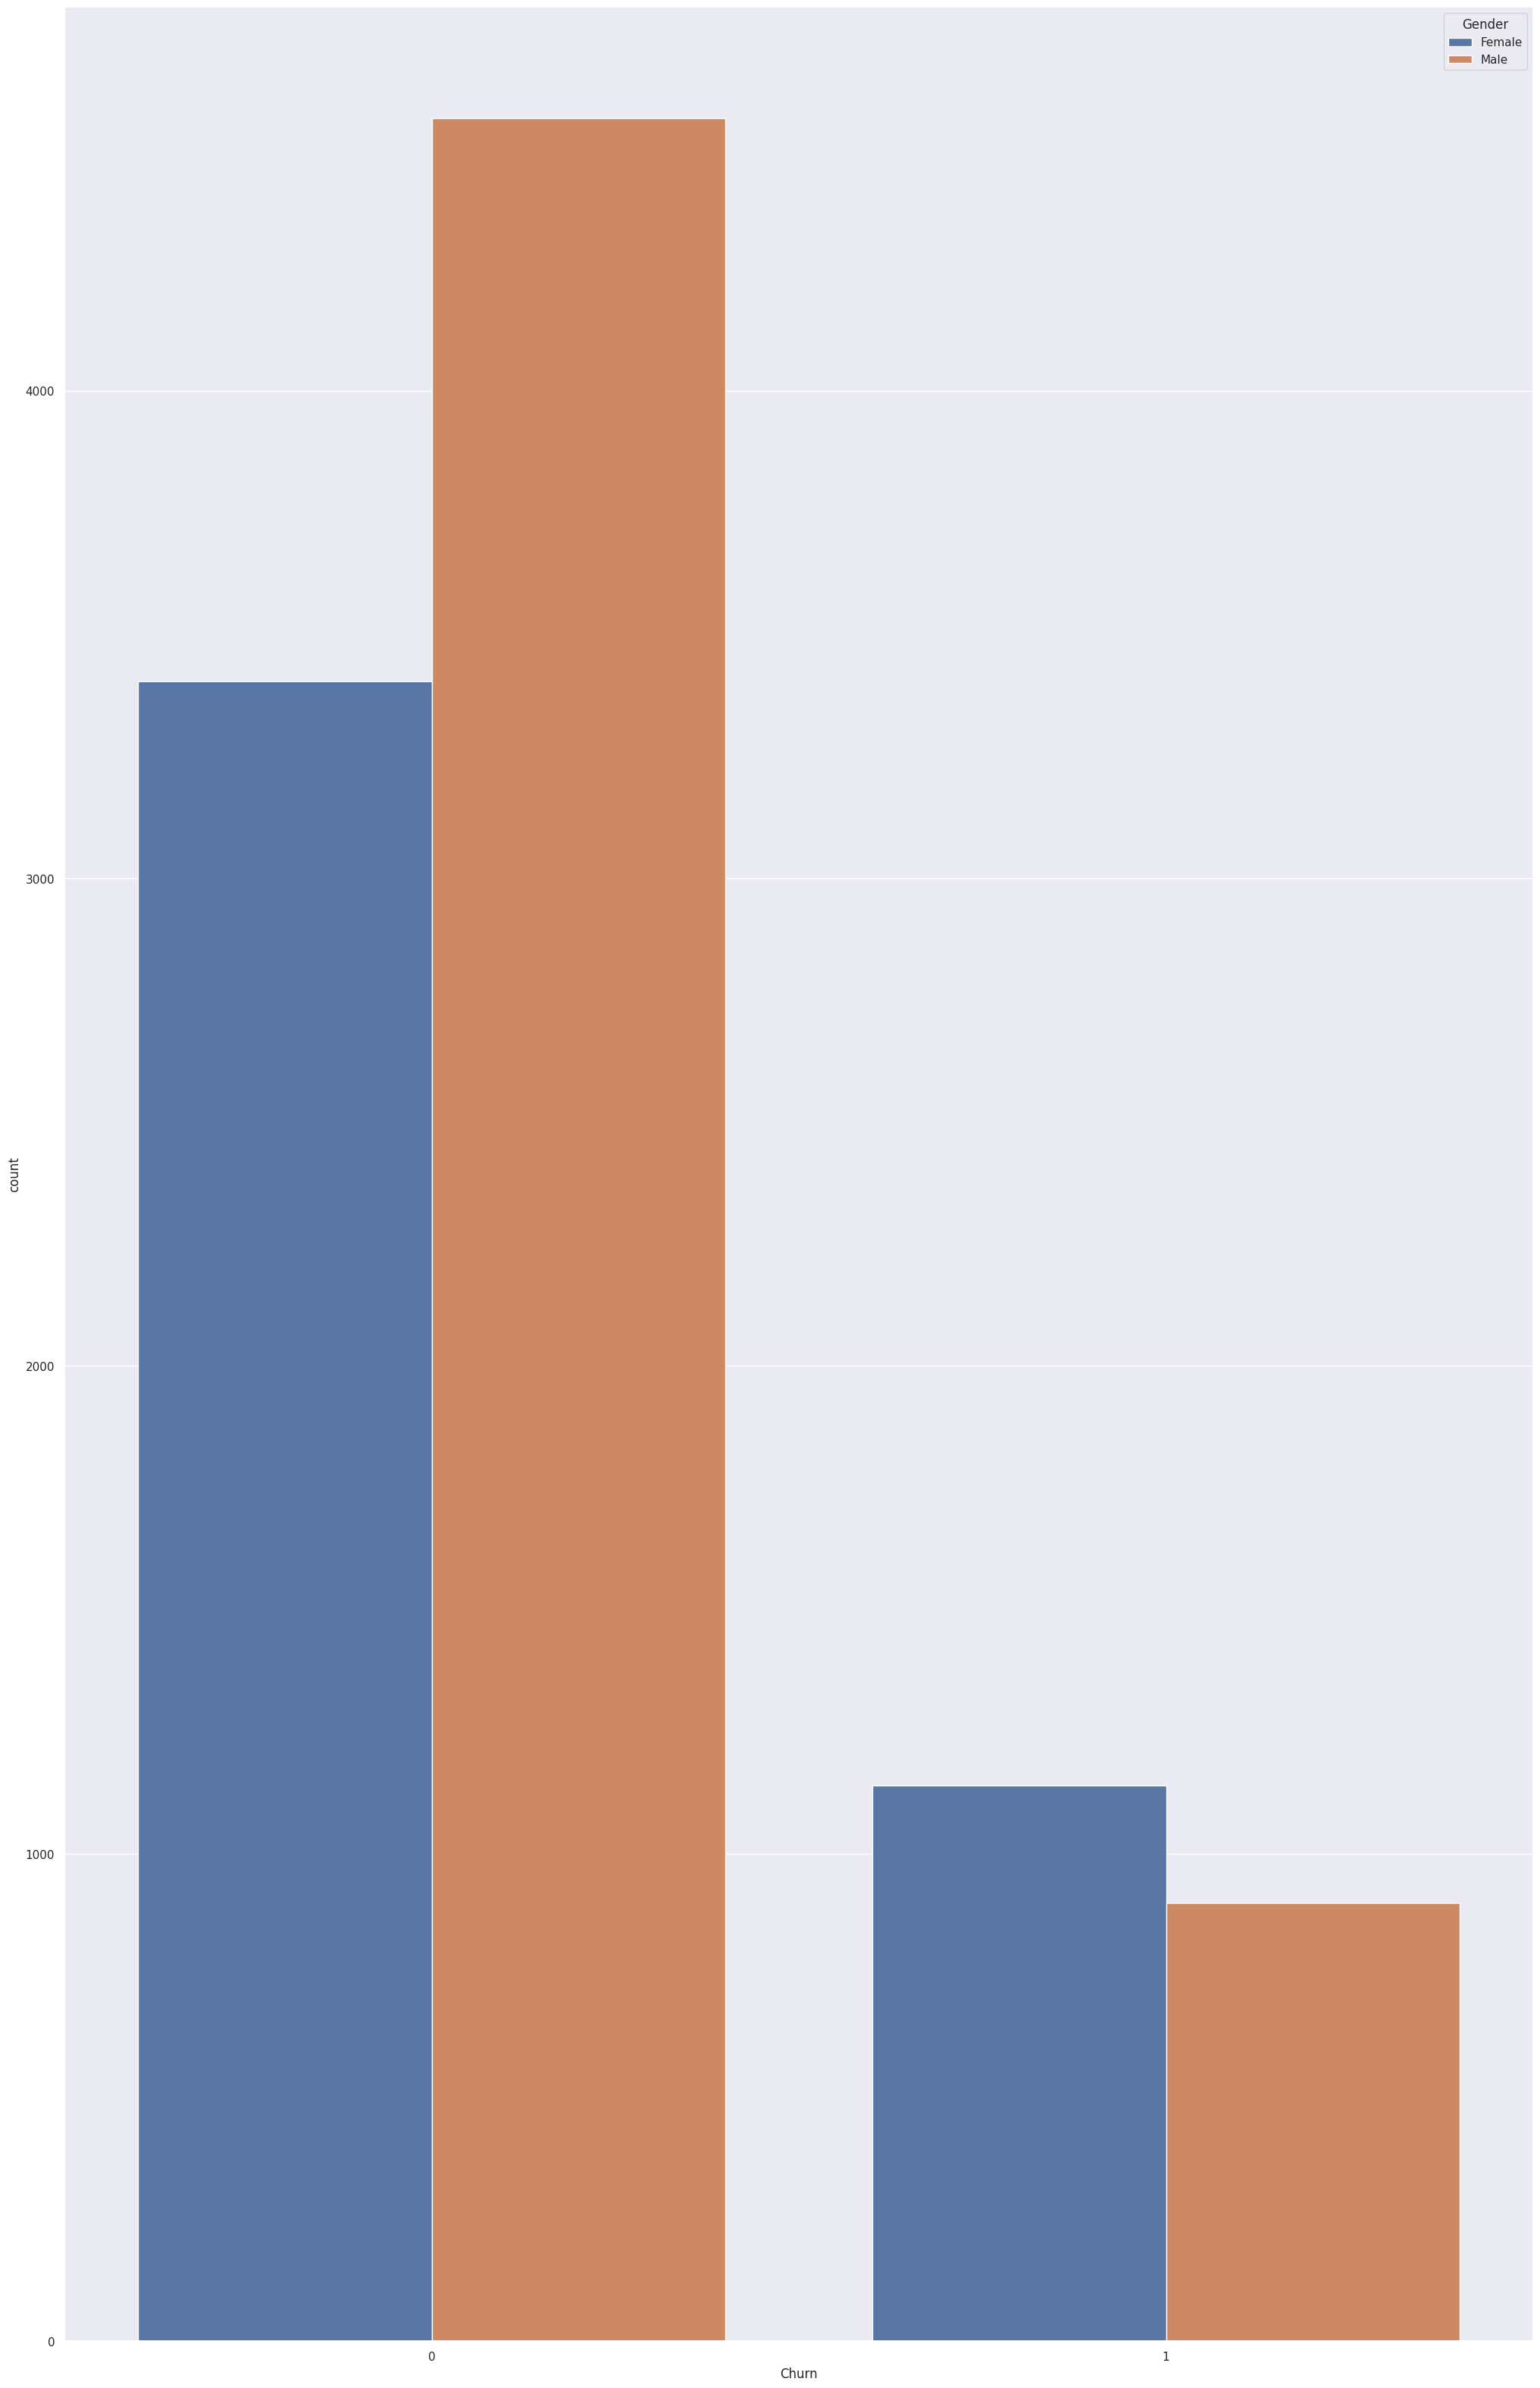

In [ ]:
sns.countplot(data=df, x='Churn', hue='Gender')

**Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler

**Define Target Variable (y) and Feature Variables (X)**

In [ ]:
X = df.drop(['Surname','Churn'], axis = 1)
y = df['Churn']
print(X)

            CreditScore Geography  Gender  Age  Tenure    Balance  \
CustomerId                                                          
15634602            619    France  Female   42       2       0.00   
15647311            608     Spain  Female   41       1   83807.86   
15619304            502    France  Female   42       8  159660.80   
15701354            699    France  Female   39       1       0.00   
15737888            850     Spain  Female   43       2  125510.82   
...                 ...       ...     ...  ...     ...        ...   
15606229            771    France    Male   39       5       0.00   
15569892            516    France    Male   35      10   57369.61   
15584532            709    France  Female   36       7       0.00   
15682355            772   Germany    Male   42       3   75075.31   
15628319            792    France  Female   28       4  130142.79   

            Num Of Products  Has Credit Card  Is Active Member  \
CustomerId                          

In [ ]:
print(y)

CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
           ..
15606229    0
15569892    0
15584532    1
15682355    1
15628319    0
Name: Churn, Length: 10000, dtype: int64


In [ ]:
df.dropna(inplace=True)

<Axes: ylabel='CustomerId'>

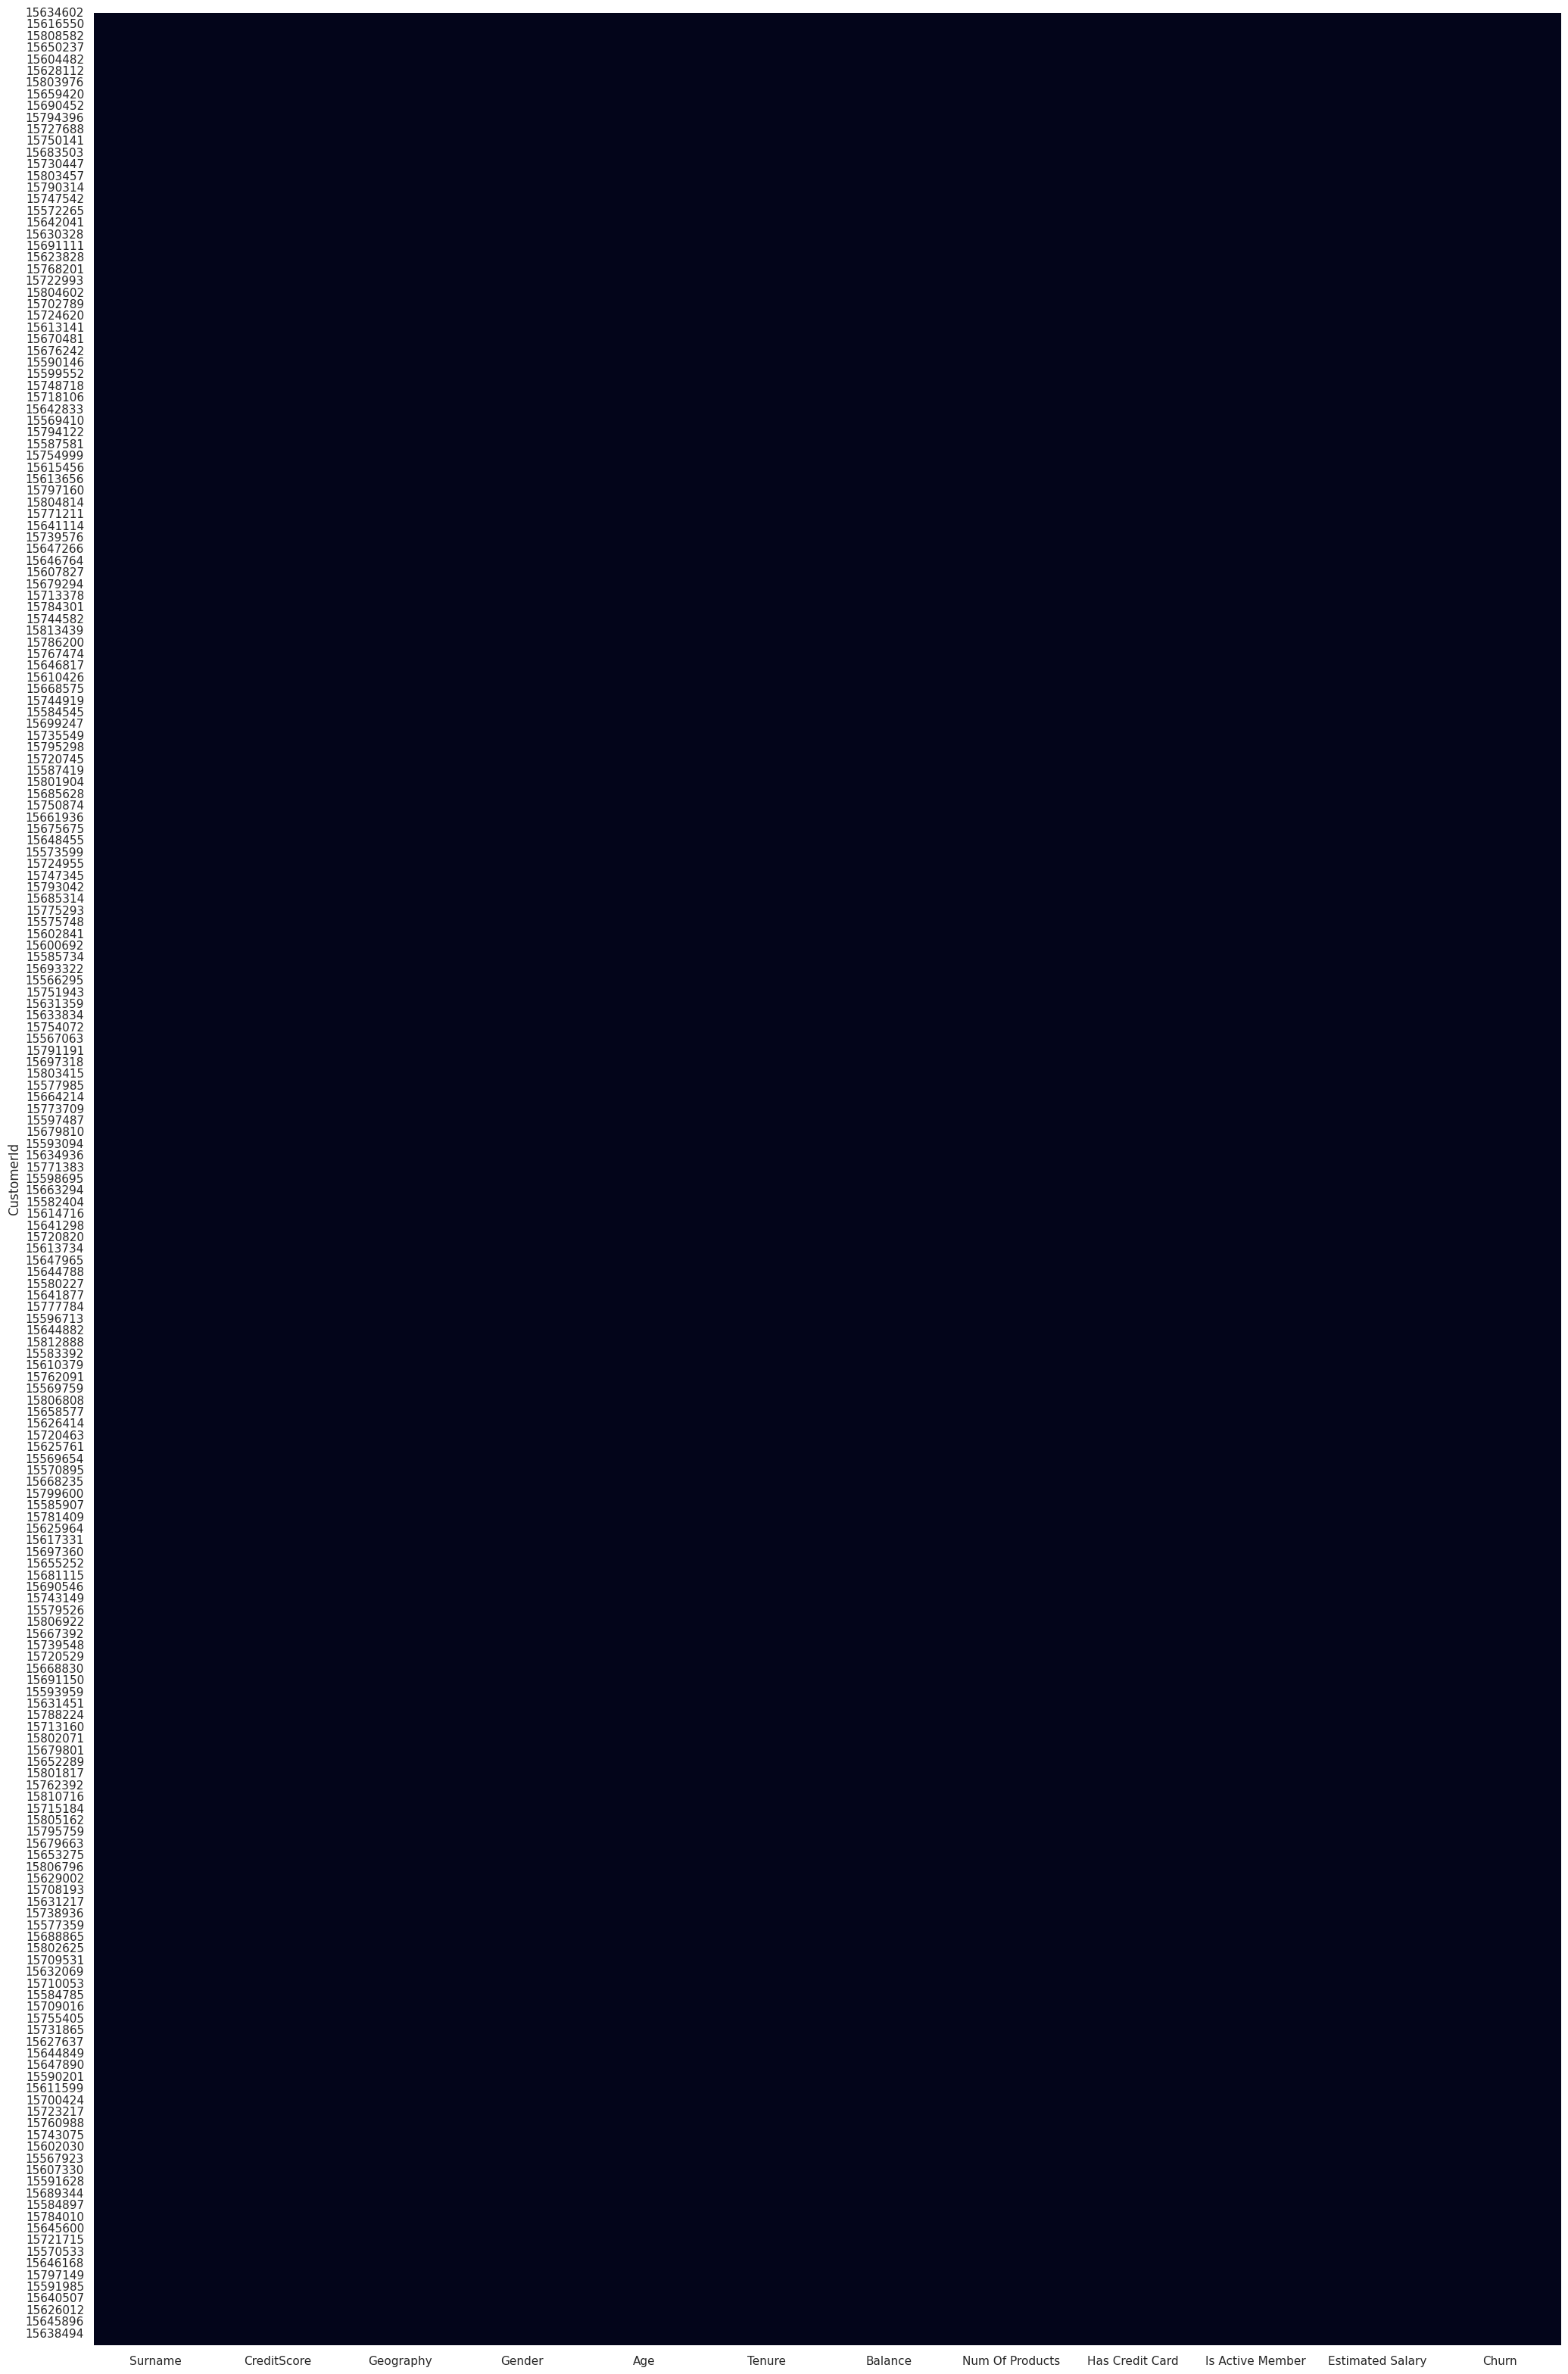

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.6, random_state= 42)
print(X.shape, X_train.shape, X_test.shape)

(10000, 10) (4000, 10) (6000, 10)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(10000,) (4000,) (6000,)


In [ ]:
X_train = pd.get_dummies(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

**Modelling**

In [ ]:
X_train.columns = X_train.columns.astype (str)
model = LogisticRegression()

**Model Evaluation**

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary'],
      dtype='object')

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
y_pred = model.predict(X_test)

**Prediction**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [ ]:
confusion_matrix (y_test, y_pred)

array([[4655,  115],
       [1140,   90]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4770
           1       0.44      0.07      0.13      1230

    accuracy                           0.79      6000
   macro avg       0.62      0.52      0.50      6000
weighted avg       0.73      0.79      0.73      6000



In [ ]:
accuracy_score(y_test, y_pred)

0.7908333333333334

**Explaination**



1. A bank customer churn model predicts customer attrition.
2. It uses historical data to identify factors leading to churn.  
3. Variables like Credit Card, Account Balance, Active Members, Credit
   Score, Estimated Salary are considered.  
4. Machine learning algorithms, like logistic regression can be
   employed.
5. The model helps banks proactively retain customers and enhance
   profitability.




